# ML for Breast Cancer Peptides

Use of Rcpi descriptors.

### New tests for data leakage using class randomization, SMOTE after data split and Undersamling

In [11]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# remove warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [12]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.metrics import confusion_matrix,accuracy_score, roc_auc_score,f1_score, recall_score, precision_score
from sklearn.utils import class_weight

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LassoCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process.kernels import RBF
from sklearn.svm import LinearSVC

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.feature_selection import RFECV, VarianceThreshold, SelectKBest, chi2
from sklearn.feature_selection import SelectFromModel, SelectPercentile, f_classif

import seaborn as sns; sns.set() # data visualization library 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from imblearn.over_sampling import SMOTE

In [19]:
from myFunctions import *

# define output variables
outVar = 'Class'

# define list of folds
nfold = 3

# define a label for output files
label = 'Outer'

seed = 74

## One function ML + preprocessing

### Testing data leakage with SMOTE before the data split (by shuffled classes)


-> Read dataset ./datasets/Mix_BreastCancer.csv

-> Modify dataset
Done!

-> Drop ProtID column
Done!

-> Dataset preprocessing
Inicial shape: (376, 8741)
Data points = 376
Columns (output + features)= 8741
Data types = [dtype('float64') dtype('int64')]


Column Names:
 Index(['A', 'R', 'N', 'D', 'C', 'E', 'Q', 'G', 'H', 'I',
       ...
       'DAYM780201.lag22', 'DAYM780201.lag23', 'DAYM780201.lag24',
       'DAYM780201.lag25', 'DAYM780201.lag26', 'DAYM780201.lag27',
       'DAYM780201.lag28', 'DAYM780201.lag29', 'DAYM780201.lag30', 'Class'],
      dtype='object', length=8741)
Categorical features: []
Columns with NaN:  0  /  8741
No of data points with NaN: 0  /  376
* Remove duplicates
Final shape: (376, 8741)
Done!

-> Get X & Y data, Features list
Shape (376, 8741)
Shape X data: (376, 8740)
Shape Y data: (376,)
Done!

-> Remove zero variance features
Removed features: ['WQM', 'CMH', 'CNW', 'WIW', 'WCK', 'YCW', 'WGC', 'MWH', 'IWW', 'VMW', 'WWV', 'QWW', 'MWP', 'WCC', 'CMW', 'WHH', 

<Figure size 432x288 with 0 Axes>

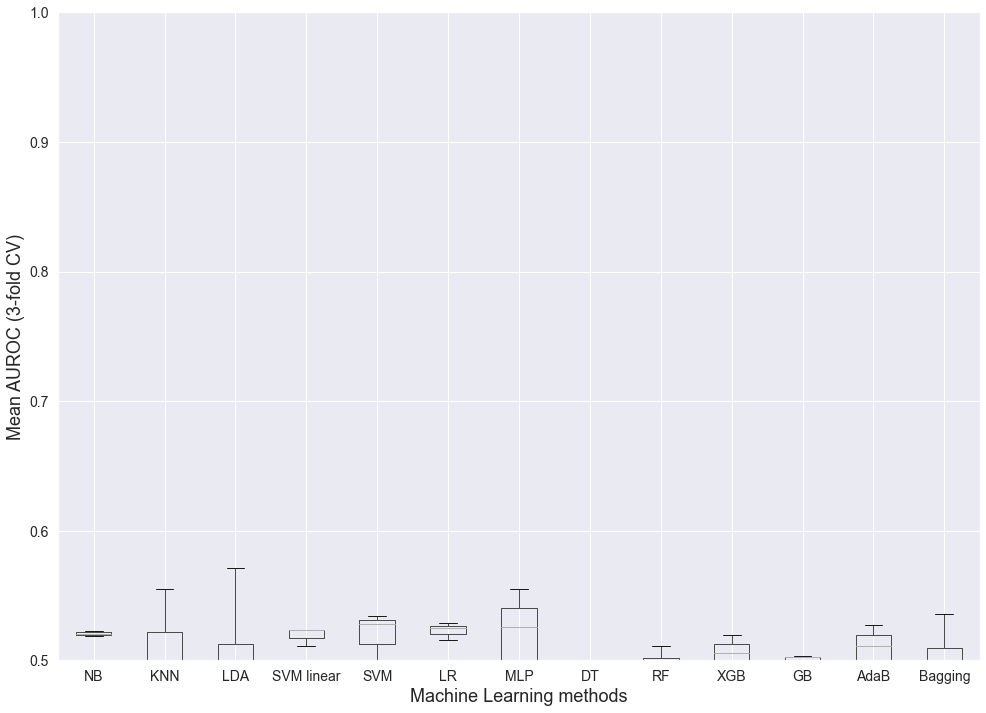

In [5]:
sFile = './datasets/Mix_BreastCancer.csv'
summaryFile = './results/Mix_BreastCancer.m.bal_pool_8708_shuffleY.csv'
boxplotFile = './results/Mix_BreastCancer.m.bal_pool_8708_shuffleY.png'
MyML_DataLeakege(sFile, summaryFile, boxplotFile, nSel=300, nPCA=0, outVar='Class', nfold=3, seed=74)

### Testing with SMOTE after the data split


-> Read dataset ./datasets/Mix_BreastCancer.csv

-> Modify dataset
Done!

-> Drop ProtID column
Done!

-> Dataset preprocessing
Inicial shape: (376, 8741)
Data points = 376
Columns (output + features)= 8741
Data types = [dtype('float64') dtype('int64')]


Column Names:
 Index(['A', 'R', 'N', 'D', 'C', 'E', 'Q', 'G', 'H', 'I',
       ...
       'DAYM780201.lag22', 'DAYM780201.lag23', 'DAYM780201.lag24',
       'DAYM780201.lag25', 'DAYM780201.lag26', 'DAYM780201.lag27',
       'DAYM780201.lag28', 'DAYM780201.lag29', 'DAYM780201.lag30', 'Class'],
      dtype='object', length=8741)
Categorical features: []
Columns with NaN:  0  /  8741
No of data points with NaN: 0  /  376
* Remove duplicates
Final shape: (376, 8741)
Done!

-> Get X & Y data, Features list
Shape (376, 8741)
Shape X data: (376, 8740)
Shape Y data: (376,)
Done!

-> Remove zero variance features
Removed features: ['WQM', 'CMH', 'CNW', 'WIW', 'WCK', 'YCW', 'WGC', 'MWH', 'IWW', 'VMW', 'WWV', 'QWW', 'MWP', 'WCC', 'CMW', 'WHH', 

c:\users\20100511141020657\appdata\local\programs\python\python39\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\users\20100511141020657\appdata\local\programs\python\python39\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\users\20100511141020657\appdata\local\programs\python\python39\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaB, 0.814, 0.0439, 0.0
Bagging, 0.844, 0.0273, 0.0
Total time: 0.06725471417109172  mins

==>> Saving summary ./results/Mix_BreastCancer.m.bal_pool_8708_SMOTEafterSplit.csv
==> Fold = 3


<Figure size 432x288 with 0 Axes>

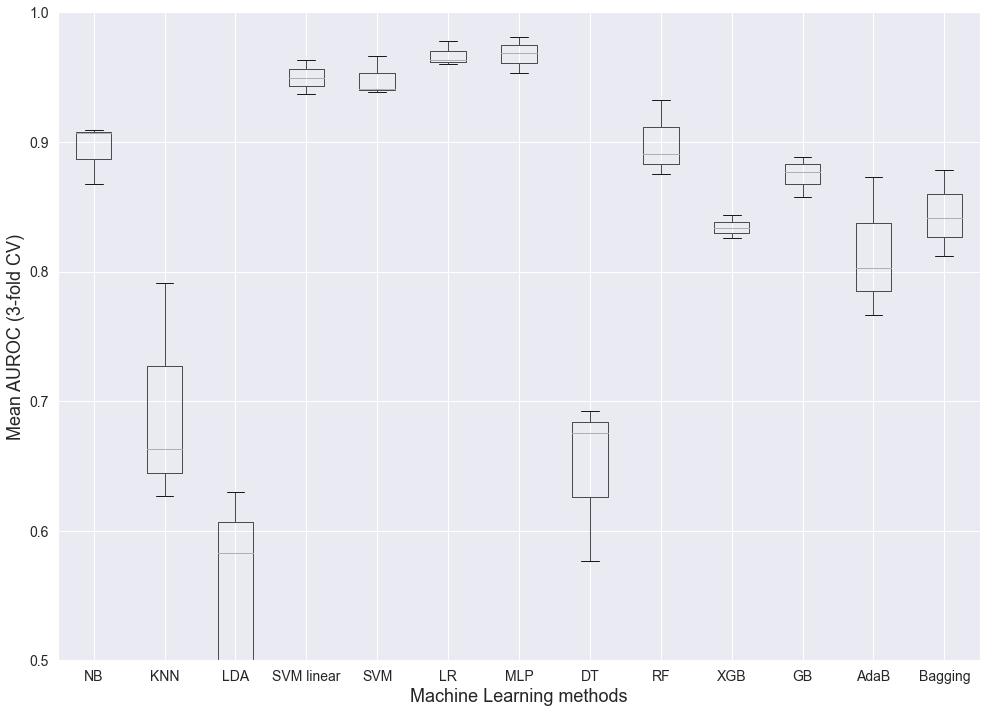

In [20]:
sFile = './datasets/Mix_BreastCancer.csv'
summaryFile = './results/Mix_BreastCancer.m.bal_pool_8708_SMOTEafterSplit.csv'
boxplotFile = './results/Mix_BreastCancer.m.bal_pool_8708_SMOTEafterSplit.png'
MyML_SMOTEafterSplit(sFile, summaryFile, boxplotFile, nSel=300, nPCA=0, outVar='Class', nfold=3, seed=74)

### Testing with Undersampling before data split 1 time only!


-> Read dataset ./datasets/Mix_BreastCancer.csv

-> Modify dataset
Done!

-> Drop ProtID column
Done!

-> Dataset preprocessing
Inicial shape: (376, 8741)
Data points = 376
Columns (output + features)= 8741
Data types = [dtype('float64') dtype('int64')]


Column Names:
 Index(['A', 'R', 'N', 'D', 'C', 'E', 'Q', 'G', 'H', 'I',
       ...
       'DAYM780201.lag22', 'DAYM780201.lag23', 'DAYM780201.lag24',
       'DAYM780201.lag25', 'DAYM780201.lag26', 'DAYM780201.lag27',
       'DAYM780201.lag28', 'DAYM780201.lag29', 'DAYM780201.lag30', 'Class'],
      dtype='object', length=8741)
Categorical features: []
Columns with NaN:  0  /  8741
No of data points with NaN: 0  /  376
* Remove duplicates
Final shape: (376, 8741)
Done!

-> Get X & Y data, Features list
Shape (376, 8741)
Shape X data: (376, 8740)
Shape Y data: (376,)
Done!

-> Remove zero variance features
Removed features: ['WQM', 'CMH', 'CNW', 'WIW', 'WCK', 'YCW', 'WGC', 'MWH', 'IWW', 'VMW', 'WWV', 'QWW', 'MWP', 'WCC', 'CMW', 'WHH', 

<Figure size 432x288 with 0 Axes>

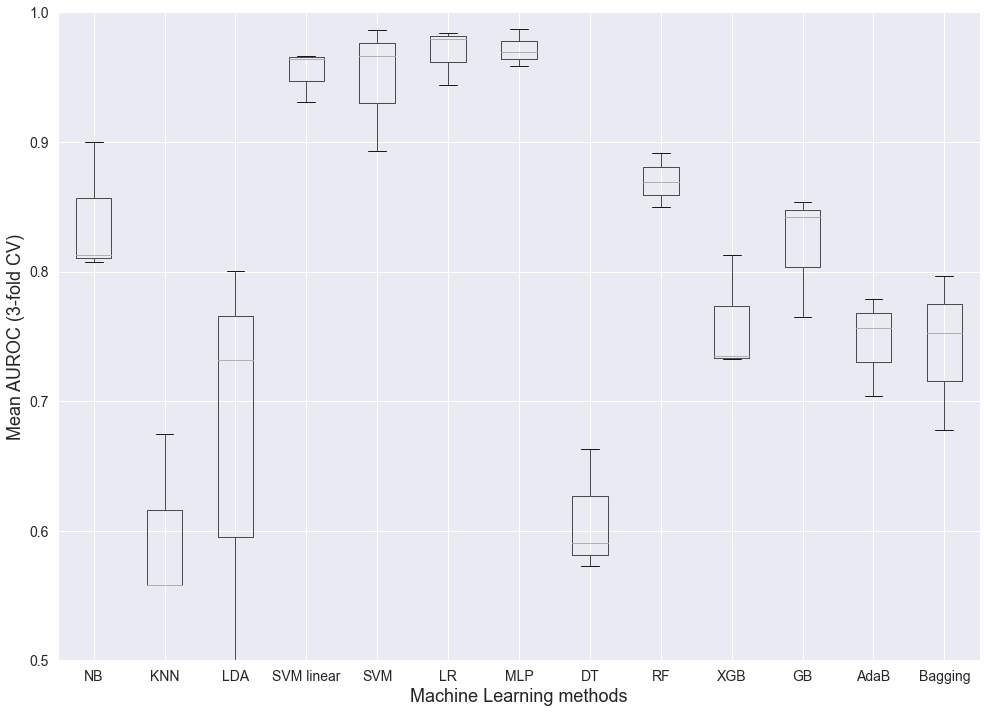

In [9]:
sFile = './datasets/Mix_BreastCancer.csv'
summaryFile = './results/Mix_BreastCancer.m.bal_pool_8708_UnderBeforeSplit.csv'
boxplotFile = './results/Mix_BreastCancer.m.bal_pool_8708_UnderBeforeSplit.png'
MyML_UnderBeforeSplit(sFile, summaryFile, boxplotFile, nSel=300, nPCA=0, outVar='Class', nfold=3, seed=74)

### Testing with Undersampling before data split 50 times

==>>> Seed= 1

Running iteration 1/50 with seed 1

-> Read dataset ./datasets/Mix_BreastCancer.csv

-> Modify dataset
Done!

-> Drop ProtID column
Done!

-> Dataset preprocessing
Inicial shape: (376, 8741)
Data points = 376
Columns (output + features)= 8741
Data types = [dtype('float64') dtype('int64')]


Column Names:
 Index(['A', 'R', 'N', 'D', 'C', 'E', 'Q', 'G', 'H', 'I',
       ...
       'DAYM780201.lag22', 'DAYM780201.lag23', 'DAYM780201.lag24',
       'DAYM780201.lag25', 'DAYM780201.lag26', 'DAYM780201.lag27',
       'DAYM780201.lag28', 'DAYM780201.lag29', 'DAYM780201.lag30', 'Class'],
      dtype='object', length=8741)
Categorical features: []
Columns with NaN:  0  /  8741
No of data points with NaN: 0  /  376
* Remove duplicates
Final shape: (376, 8741)
Done!

-> Get X & Y data, Features list
Shape (376, 8741)
Shape X data: (376, 8740)
Shape Y data: (376,)
Done!

-> Remove zero variance features
Removed features: ['WQM', 'CMH', 'CNW', 'WIW', 'WCK', 'YCW', 'WGC', 'MWH', 'IWW',

<Figure size 432x288 with 0 Axes>

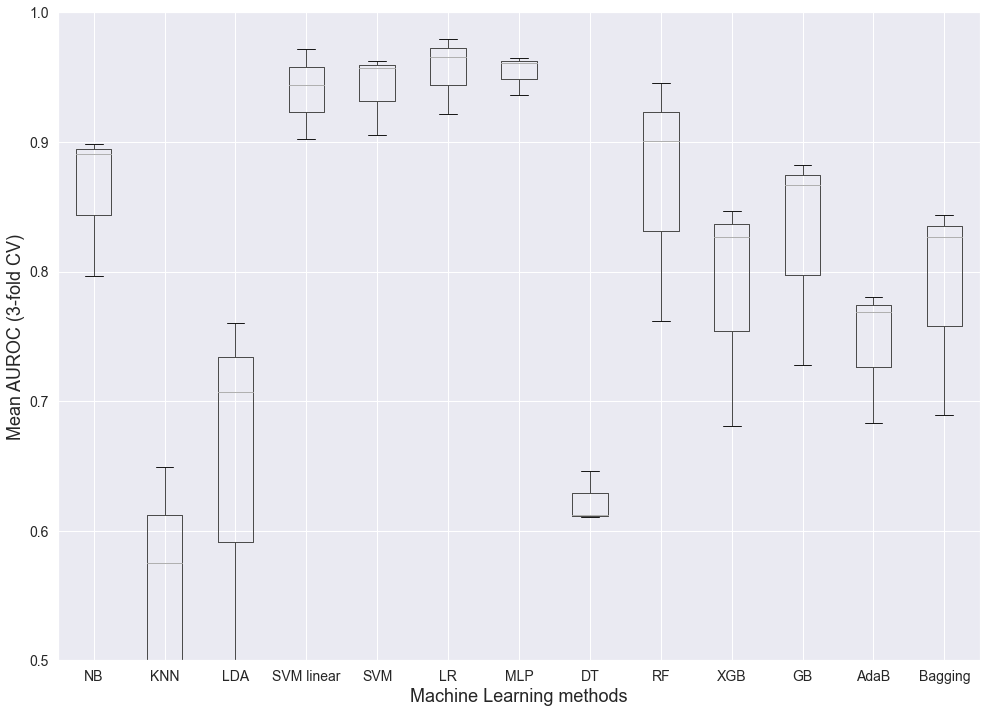

==>>> Seed= 2

Running iteration 2/50 with seed 2

-> Read dataset ./datasets/Mix_BreastCancer.csv

-> Modify dataset
Done!

-> Drop ProtID column
Done!

-> Dataset preprocessing
Inicial shape: (376, 8741)
Data points = 376
Columns (output + features)= 8741
Data types = [dtype('float64') dtype('int64')]


Column Names:
 Index(['A', 'R', 'N', 'D', 'C', 'E', 'Q', 'G', 'H', 'I',
       ...
       'DAYM780201.lag22', 'DAYM780201.lag23', 'DAYM780201.lag24',
       'DAYM780201.lag25', 'DAYM780201.lag26', 'DAYM780201.lag27',
       'DAYM780201.lag28', 'DAYM780201.lag29', 'DAYM780201.lag30', 'Class'],
      dtype='object', length=8741)
Categorical features: []
Columns with NaN:  0  /  8741
No of data points with NaN: 0  /  376
* Remove duplicates
Final shape: (376, 8741)
Done!

-> Get X & Y data, Features list
Shape (376, 8741)
Shape X data: (376, 8740)
Shape Y data: (376,)
Done!

-> Remove zero variance features
Removed features: ['WQM', 'CMH', 'CNW', 'WIW', 'WCK', 'YCW', 'WGC', 'MWH', 'IWW',

<Figure size 432x288 with 0 Axes>

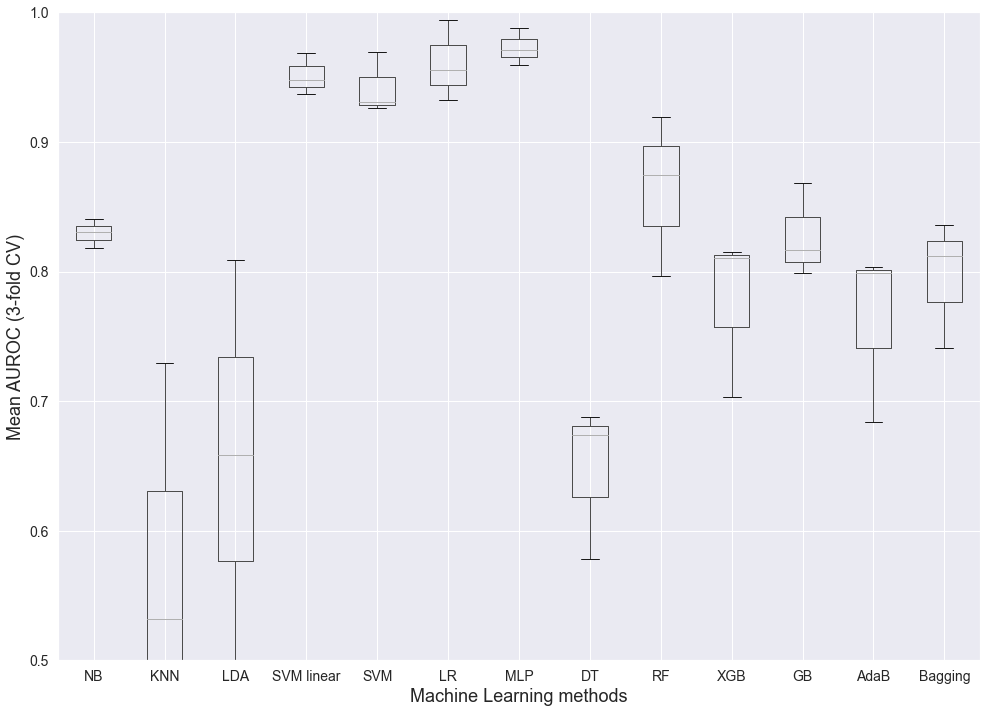

==>>> Seed= 3

Running iteration 3/50 with seed 3

-> Read dataset ./datasets/Mix_BreastCancer.csv

-> Modify dataset
Done!

-> Drop ProtID column
Done!

-> Dataset preprocessing
Inicial shape: (376, 8741)
Data points = 376
Columns (output + features)= 8741
Data types = [dtype('float64') dtype('int64')]


Column Names:
 Index(['A', 'R', 'N', 'D', 'C', 'E', 'Q', 'G', 'H', 'I',
       ...
       'DAYM780201.lag22', 'DAYM780201.lag23', 'DAYM780201.lag24',
       'DAYM780201.lag25', 'DAYM780201.lag26', 'DAYM780201.lag27',
       'DAYM780201.lag28', 'DAYM780201.lag29', 'DAYM780201.lag30', 'Class'],
      dtype='object', length=8741)
Categorical features: []
Columns with NaN:  0  /  8741
No of data points with NaN: 0  /  376
* Remove duplicates
Final shape: (376, 8741)
Done!

-> Get X & Y data, Features list
Shape (376, 8741)
Shape X data: (376, 8740)
Shape Y data: (376,)
Done!

-> Remove zero variance features
Removed features: ['WQM', 'CMH', 'CNW', 'WIW', 'WCK', 'YCW', 'WGC', 'MWH', 'IWW',

<Figure size 432x288 with 0 Axes>

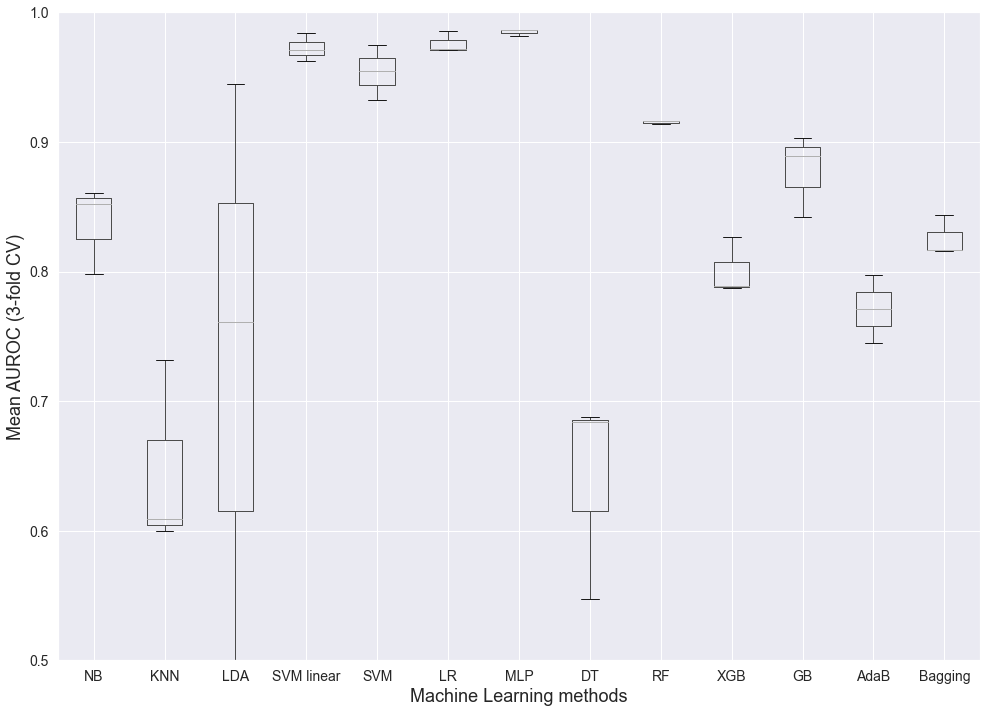

==>>> Seed= 4

Running iteration 4/50 with seed 4

-> Read dataset ./datasets/Mix_BreastCancer.csv

-> Modify dataset
Done!

-> Drop ProtID column
Done!

-> Dataset preprocessing
Inicial shape: (376, 8741)
Data points = 376
Columns (output + features)= 8741
Data types = [dtype('float64') dtype('int64')]


Column Names:
 Index(['A', 'R', 'N', 'D', 'C', 'E', 'Q', 'G', 'H', 'I',
       ...
       'DAYM780201.lag22', 'DAYM780201.lag23', 'DAYM780201.lag24',
       'DAYM780201.lag25', 'DAYM780201.lag26', 'DAYM780201.lag27',
       'DAYM780201.lag28', 'DAYM780201.lag29', 'DAYM780201.lag30', 'Class'],
      dtype='object', length=8741)
Categorical features: []
Columns with NaN:  0  /  8741
No of data points with NaN: 0  /  376
* Remove duplicates
Final shape: (376, 8741)
Done!

-> Get X & Y data, Features list
Shape (376, 8741)
Shape X data: (376, 8740)
Shape Y data: (376,)
Done!

-> Remove zero variance features
Removed features: ['WQM', 'CMH', 'CNW', 'WIW', 'WCK', 'YCW', 'WGC', 'MWH', 'IWW',

<Figure size 432x288 with 0 Axes>

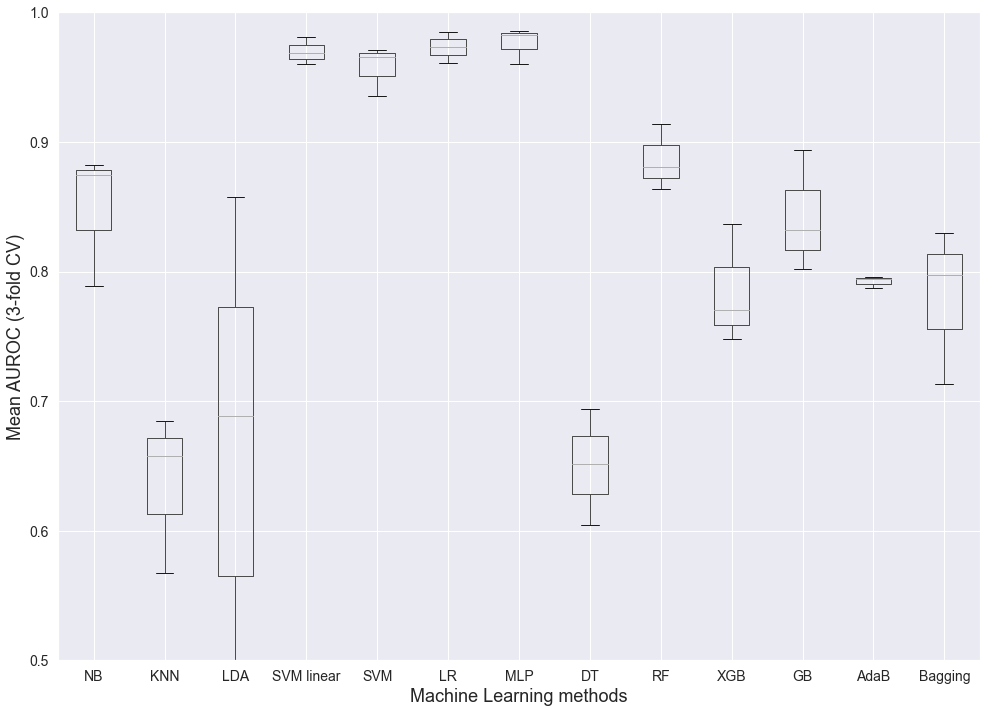

==>>> Seed= 5

Running iteration 5/50 with seed 5

-> Read dataset ./datasets/Mix_BreastCancer.csv

-> Modify dataset
Done!

-> Drop ProtID column
Done!

-> Dataset preprocessing
Inicial shape: (376, 8741)
Data points = 376
Columns (output + features)= 8741
Data types = [dtype('float64') dtype('int64')]


Column Names:
 Index(['A', 'R', 'N', 'D', 'C', 'E', 'Q', 'G', 'H', 'I',
       ...
       'DAYM780201.lag22', 'DAYM780201.lag23', 'DAYM780201.lag24',
       'DAYM780201.lag25', 'DAYM780201.lag26', 'DAYM780201.lag27',
       'DAYM780201.lag28', 'DAYM780201.lag29', 'DAYM780201.lag30', 'Class'],
      dtype='object', length=8741)
Categorical features: []
Columns with NaN:  0  /  8741
No of data points with NaN: 0  /  376
* Remove duplicates
Final shape: (376, 8741)
Done!

-> Get X & Y data, Features list
Shape (376, 8741)
Shape X data: (376, 8740)
Shape Y data: (376,)
Done!

-> Remove zero variance features
Removed features: ['WQM', 'CMH', 'CNW', 'WIW', 'WCK', 'YCW', 'WGC', 'MWH', 'IWW',

<Figure size 432x288 with 0 Axes>

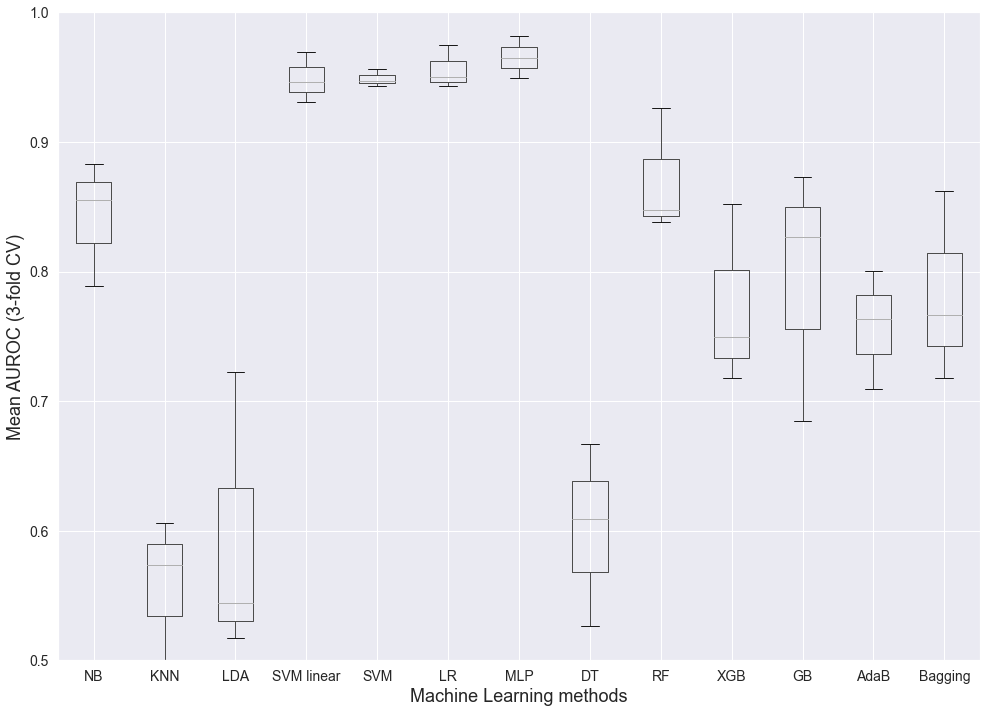

==>>> Seed= 6

Running iteration 6/50 with seed 6

-> Read dataset ./datasets/Mix_BreastCancer.csv

-> Modify dataset
Done!

-> Drop ProtID column
Done!

-> Dataset preprocessing
Inicial shape: (376, 8741)
Data points = 376
Columns (output + features)= 8741
Data types = [dtype('float64') dtype('int64')]


Column Names:
 Index(['A', 'R', 'N', 'D', 'C', 'E', 'Q', 'G', 'H', 'I',
       ...
       'DAYM780201.lag22', 'DAYM780201.lag23', 'DAYM780201.lag24',
       'DAYM780201.lag25', 'DAYM780201.lag26', 'DAYM780201.lag27',
       'DAYM780201.lag28', 'DAYM780201.lag29', 'DAYM780201.lag30', 'Class'],
      dtype='object', length=8741)
Categorical features: []
Columns with NaN:  0  /  8741
No of data points with NaN: 0  /  376
* Remove duplicates
Final shape: (376, 8741)
Done!

-> Get X & Y data, Features list
Shape (376, 8741)
Shape X data: (376, 8740)
Shape Y data: (376,)
Done!

-> Remove zero variance features
Removed features: ['WQM', 'CMH', 'CNW', 'WIW', 'WCK', 'YCW', 'WGC', 'MWH', 'IWW',

<Figure size 432x288 with 0 Axes>

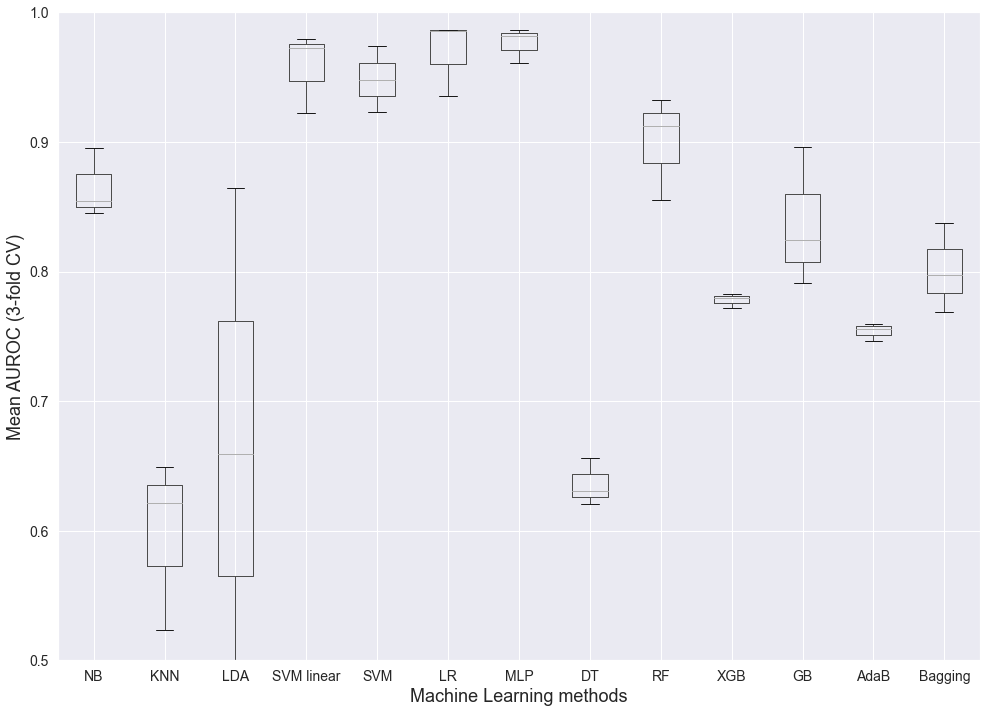

==>>> Seed= 7

Running iteration 7/50 with seed 7

-> Read dataset ./datasets/Mix_BreastCancer.csv

-> Modify dataset
Done!

-> Drop ProtID column
Done!

-> Dataset preprocessing
Inicial shape: (376, 8741)
Data points = 376
Columns (output + features)= 8741
Data types = [dtype('float64') dtype('int64')]


Column Names:
 Index(['A', 'R', 'N', 'D', 'C', 'E', 'Q', 'G', 'H', 'I',
       ...
       'DAYM780201.lag22', 'DAYM780201.lag23', 'DAYM780201.lag24',
       'DAYM780201.lag25', 'DAYM780201.lag26', 'DAYM780201.lag27',
       'DAYM780201.lag28', 'DAYM780201.lag29', 'DAYM780201.lag30', 'Class'],
      dtype='object', length=8741)
Categorical features: []
Columns with NaN:  0  /  8741
No of data points with NaN: 0  /  376
* Remove duplicates
Final shape: (376, 8741)
Done!

-> Get X & Y data, Features list
Shape (376, 8741)
Shape X data: (376, 8740)
Shape Y data: (376,)
Done!

-> Remove zero variance features
Removed features: ['WQM', 'CMH', 'CNW', 'WIW', 'WCK', 'YCW', 'WGC', 'MWH', 'IWW',

<Figure size 432x288 with 0 Axes>

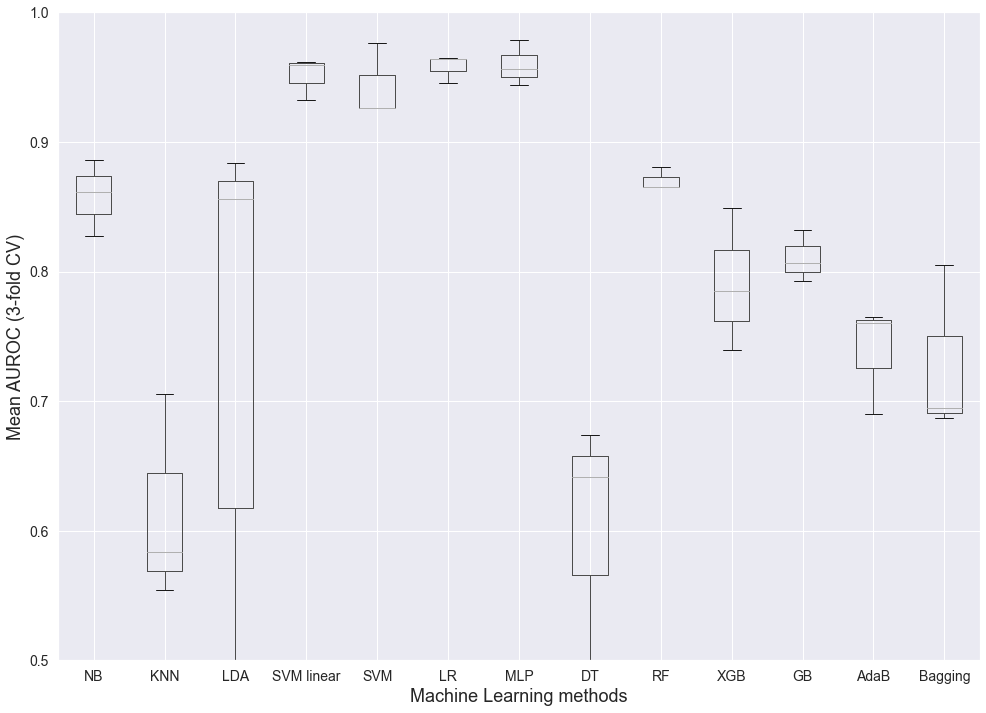

==>>> Seed= 8

Running iteration 8/50 with seed 8

-> Read dataset ./datasets/Mix_BreastCancer.csv

-> Modify dataset
Done!

-> Drop ProtID column
Done!

-> Dataset preprocessing
Inicial shape: (376, 8741)
Data points = 376
Columns (output + features)= 8741
Data types = [dtype('float64') dtype('int64')]


Column Names:
 Index(['A', 'R', 'N', 'D', 'C', 'E', 'Q', 'G', 'H', 'I',
       ...
       'DAYM780201.lag22', 'DAYM780201.lag23', 'DAYM780201.lag24',
       'DAYM780201.lag25', 'DAYM780201.lag26', 'DAYM780201.lag27',
       'DAYM780201.lag28', 'DAYM780201.lag29', 'DAYM780201.lag30', 'Class'],
      dtype='object', length=8741)
Categorical features: []
Columns with NaN:  0  /  8741
No of data points with NaN: 0  /  376
* Remove duplicates
Final shape: (376, 8741)
Done!

-> Get X & Y data, Features list
Shape (376, 8741)
Shape X data: (376, 8740)
Shape Y data: (376,)
Done!

-> Remove zero variance features
Removed features: ['WQM', 'CMH', 'CNW', 'WIW', 'WCK', 'YCW', 'WGC', 'MWH', 'IWW',

<Figure size 432x288 with 0 Axes>

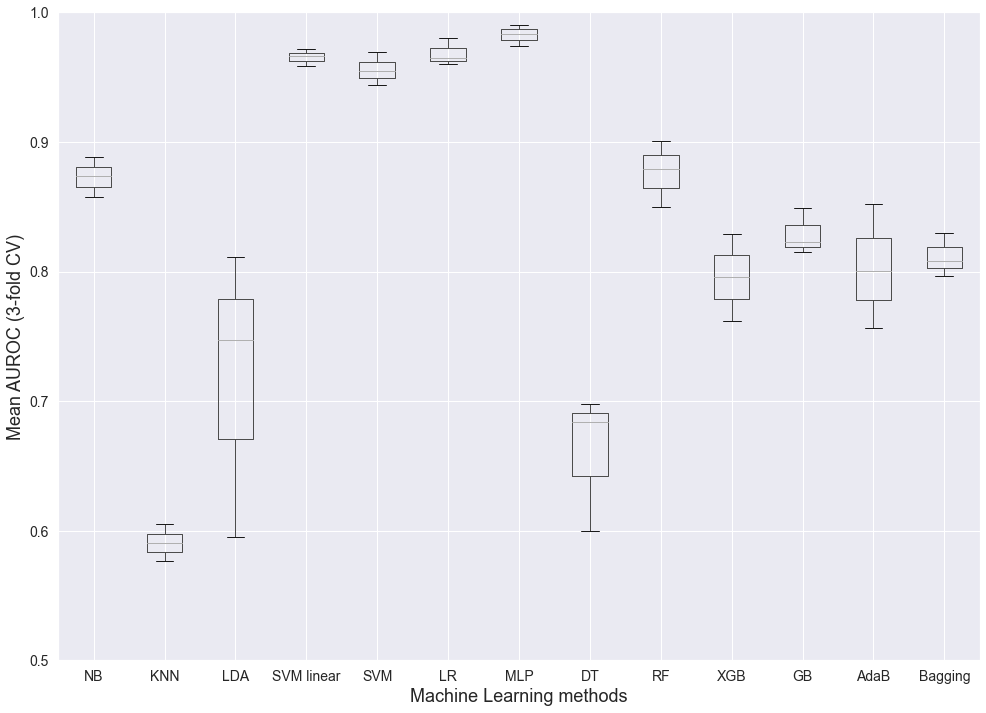

==>>> Seed= 9

Running iteration 9/50 with seed 9

-> Read dataset ./datasets/Mix_BreastCancer.csv

-> Modify dataset
Done!

-> Drop ProtID column
Done!

-> Dataset preprocessing
Inicial shape: (376, 8741)
Data points = 376
Columns (output + features)= 8741
Data types = [dtype('float64') dtype('int64')]


Column Names:
 Index(['A', 'R', 'N', 'D', 'C', 'E', 'Q', 'G', 'H', 'I',
       ...
       'DAYM780201.lag22', 'DAYM780201.lag23', 'DAYM780201.lag24',
       'DAYM780201.lag25', 'DAYM780201.lag26', 'DAYM780201.lag27',
       'DAYM780201.lag28', 'DAYM780201.lag29', 'DAYM780201.lag30', 'Class'],
      dtype='object', length=8741)
Categorical features: []
Columns with NaN:  0  /  8741
No of data points with NaN: 0  /  376
* Remove duplicates
Final shape: (376, 8741)
Done!

-> Get X & Y data, Features list
Shape (376, 8741)
Shape X data: (376, 8740)
Shape Y data: (376,)
Done!

-> Remove zero variance features
Removed features: ['WQM', 'CMH', 'CNW', 'WIW', 'WCK', 'YCW', 'WGC', 'MWH', 'IWW',

<Figure size 432x288 with 0 Axes>

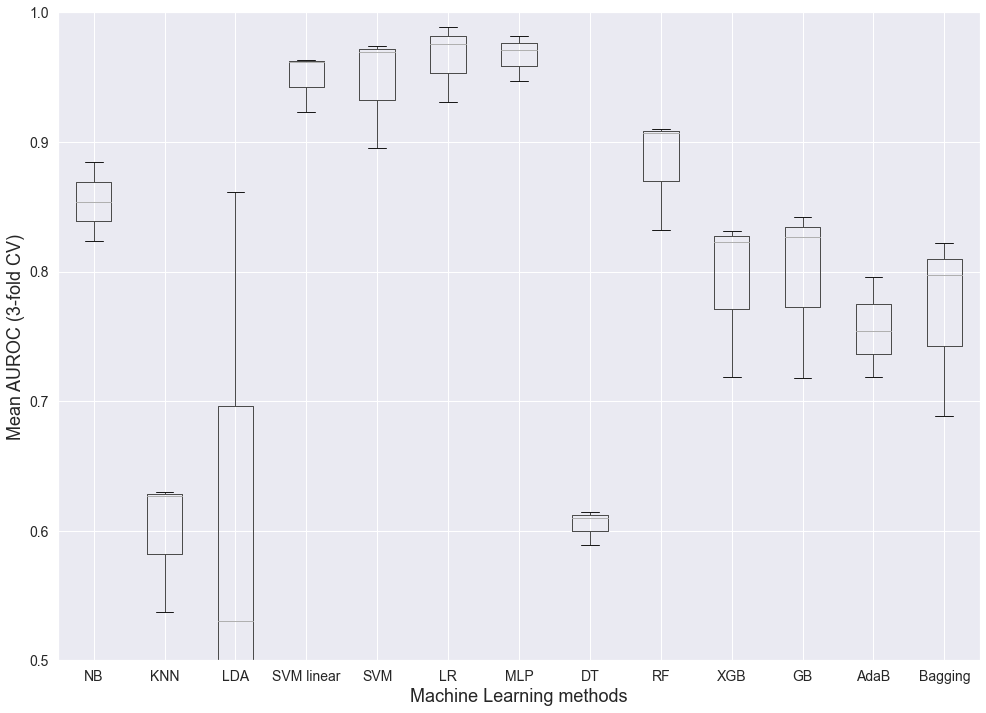

==>>> Seed= 10

Running iteration 10/50 with seed 10

-> Read dataset ./datasets/Mix_BreastCancer.csv

-> Modify dataset
Done!

-> Drop ProtID column
Done!

-> Dataset preprocessing
Inicial shape: (376, 8741)
Data points = 376
Columns (output + features)= 8741
Data types = [dtype('float64') dtype('int64')]


Column Names:
 Index(['A', 'R', 'N', 'D', 'C', 'E', 'Q', 'G', 'H', 'I',
       ...
       'DAYM780201.lag22', 'DAYM780201.lag23', 'DAYM780201.lag24',
       'DAYM780201.lag25', 'DAYM780201.lag26', 'DAYM780201.lag27',
       'DAYM780201.lag28', 'DAYM780201.lag29', 'DAYM780201.lag30', 'Class'],
      dtype='object', length=8741)
Categorical features: []
Columns with NaN:  0  /  8741
No of data points with NaN: 0  /  376
* Remove duplicates
Final shape: (376, 8741)
Done!

-> Get X & Y data, Features list
Shape (376, 8741)
Shape X data: (376, 8740)
Shape Y data: (376,)
Done!

-> Remove zero variance features
Removed features: ['WQM', 'CMH', 'CNW', 'WIW', 'WCK', 'YCW', 'WGC', 'MWH', 'IW

<Figure size 432x288 with 0 Axes>

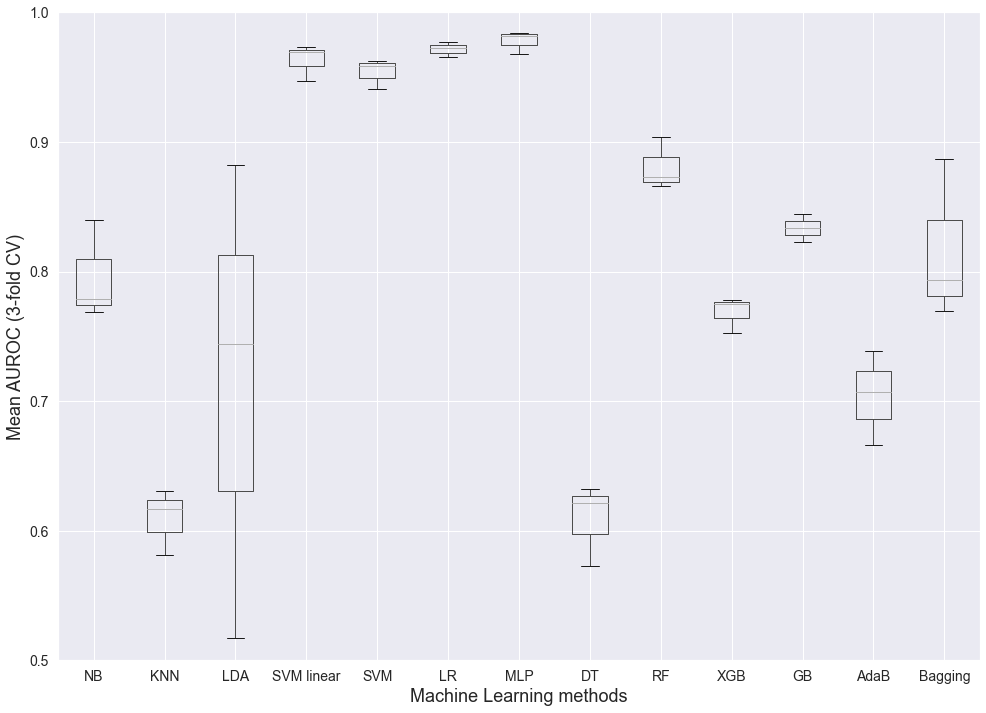

==>>> Seed= 11

Running iteration 11/50 with seed 11

-> Read dataset ./datasets/Mix_BreastCancer.csv

-> Modify dataset
Done!

-> Drop ProtID column
Done!

-> Dataset preprocessing
Inicial shape: (376, 8741)
Data points = 376
Columns (output + features)= 8741
Data types = [dtype('float64') dtype('int64')]


Column Names:
 Index(['A', 'R', 'N', 'D', 'C', 'E', 'Q', 'G', 'H', 'I',
       ...
       'DAYM780201.lag22', 'DAYM780201.lag23', 'DAYM780201.lag24',
       'DAYM780201.lag25', 'DAYM780201.lag26', 'DAYM780201.lag27',
       'DAYM780201.lag28', 'DAYM780201.lag29', 'DAYM780201.lag30', 'Class'],
      dtype='object', length=8741)
Categorical features: []
Columns with NaN:  0  /  8741
No of data points with NaN: 0  /  376
* Remove duplicates
Final shape: (376, 8741)
Done!

-> Get X & Y data, Features list
Shape (376, 8741)
Shape X data: (376, 8740)
Shape Y data: (376,)
Done!

-> Remove zero variance features
Removed features: ['WQM', 'CMH', 'CNW', 'WIW', 'WCK', 'YCW', 'WGC', 'MWH', 'IW

<Figure size 432x288 with 0 Axes>

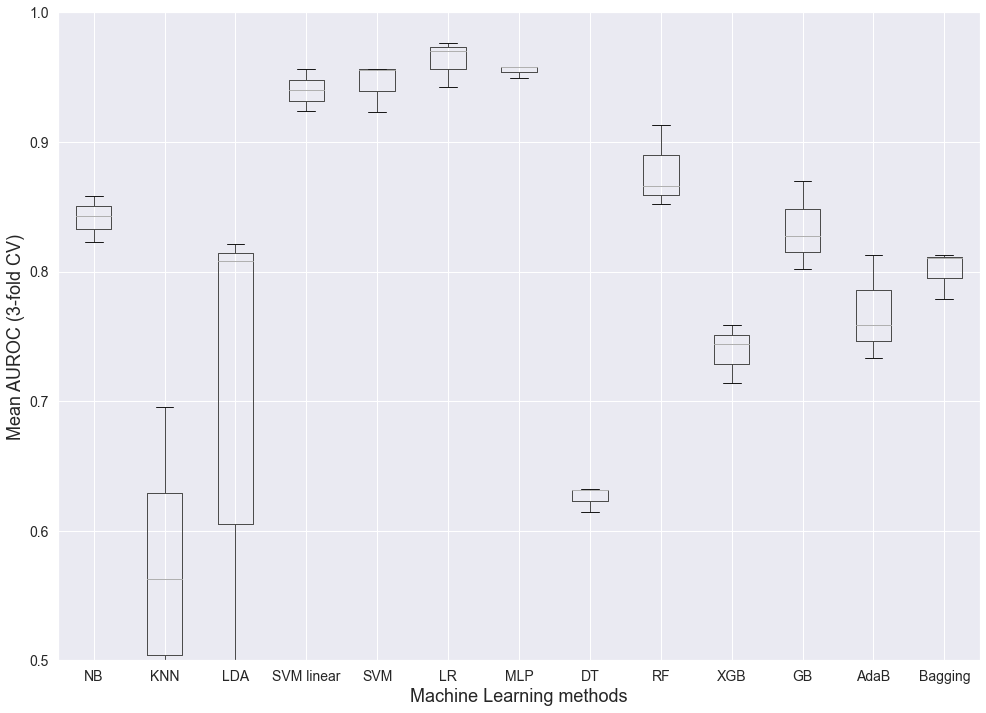

==>>> Seed= 12

Running iteration 12/50 with seed 12

-> Read dataset ./datasets/Mix_BreastCancer.csv

-> Modify dataset
Done!

-> Drop ProtID column
Done!

-> Dataset preprocessing
Inicial shape: (376, 8741)
Data points = 376
Columns (output + features)= 8741
Data types = [dtype('float64') dtype('int64')]


Column Names:
 Index(['A', 'R', 'N', 'D', 'C', 'E', 'Q', 'G', 'H', 'I',
       ...
       'DAYM780201.lag22', 'DAYM780201.lag23', 'DAYM780201.lag24',
       'DAYM780201.lag25', 'DAYM780201.lag26', 'DAYM780201.lag27',
       'DAYM780201.lag28', 'DAYM780201.lag29', 'DAYM780201.lag30', 'Class'],
      dtype='object', length=8741)
Categorical features: []
Columns with NaN:  0  /  8741
No of data points with NaN: 0  /  376
* Remove duplicates
Final shape: (376, 8741)
Done!

-> Get X & Y data, Features list
Shape (376, 8741)
Shape X data: (376, 8740)
Shape Y data: (376,)
Done!

-> Remove zero variance features
Removed features: ['WQM', 'CMH', 'CNW', 'WIW', 'WCK', 'YCW', 'WGC', 'MWH', 'IW

<Figure size 432x288 with 0 Axes>

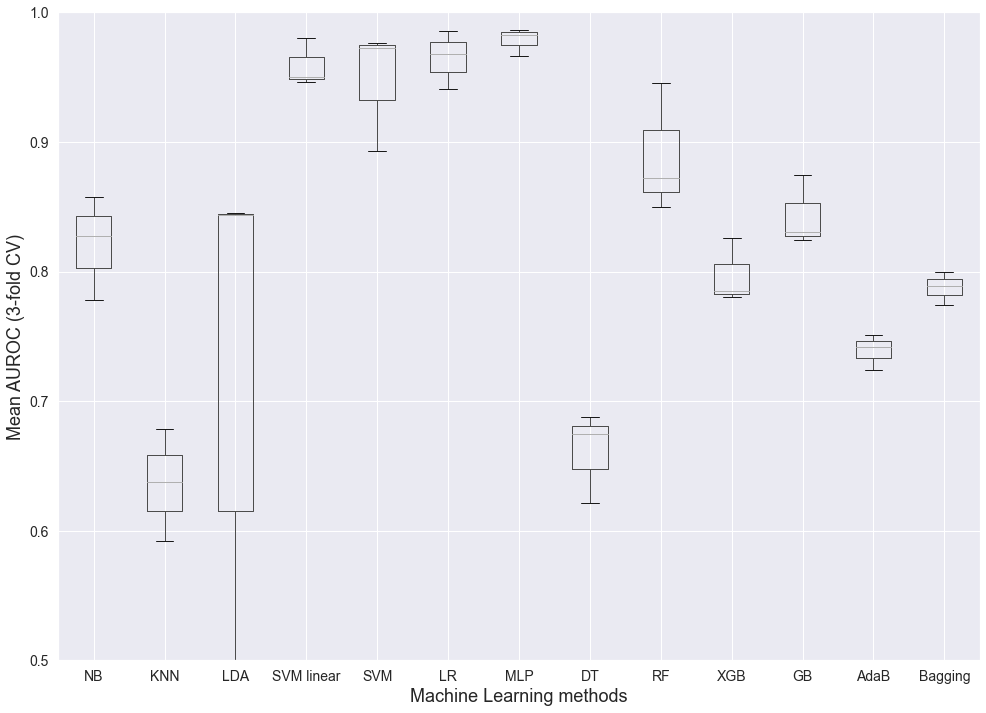

==>>> Seed= 13

Running iteration 13/50 with seed 13

-> Read dataset ./datasets/Mix_BreastCancer.csv

-> Modify dataset
Done!

-> Drop ProtID column
Done!

-> Dataset preprocessing
Inicial shape: (376, 8741)
Data points = 376
Columns (output + features)= 8741
Data types = [dtype('float64') dtype('int64')]


Column Names:
 Index(['A', 'R', 'N', 'D', 'C', 'E', 'Q', 'G', 'H', 'I',
       ...
       'DAYM780201.lag22', 'DAYM780201.lag23', 'DAYM780201.lag24',
       'DAYM780201.lag25', 'DAYM780201.lag26', 'DAYM780201.lag27',
       'DAYM780201.lag28', 'DAYM780201.lag29', 'DAYM780201.lag30', 'Class'],
      dtype='object', length=8741)
Categorical features: []
Columns with NaN:  0  /  8741
No of data points with NaN: 0  /  376
* Remove duplicates
Final shape: (376, 8741)
Done!

-> Get X & Y data, Features list
Shape (376, 8741)
Shape X data: (376, 8740)
Shape Y data: (376,)
Done!

-> Remove zero variance features
Removed features: ['WQM', 'CMH', 'CNW', 'WIW', 'WCK', 'YCW', 'WGC', 'MWH', 'IW

<Figure size 432x288 with 0 Axes>

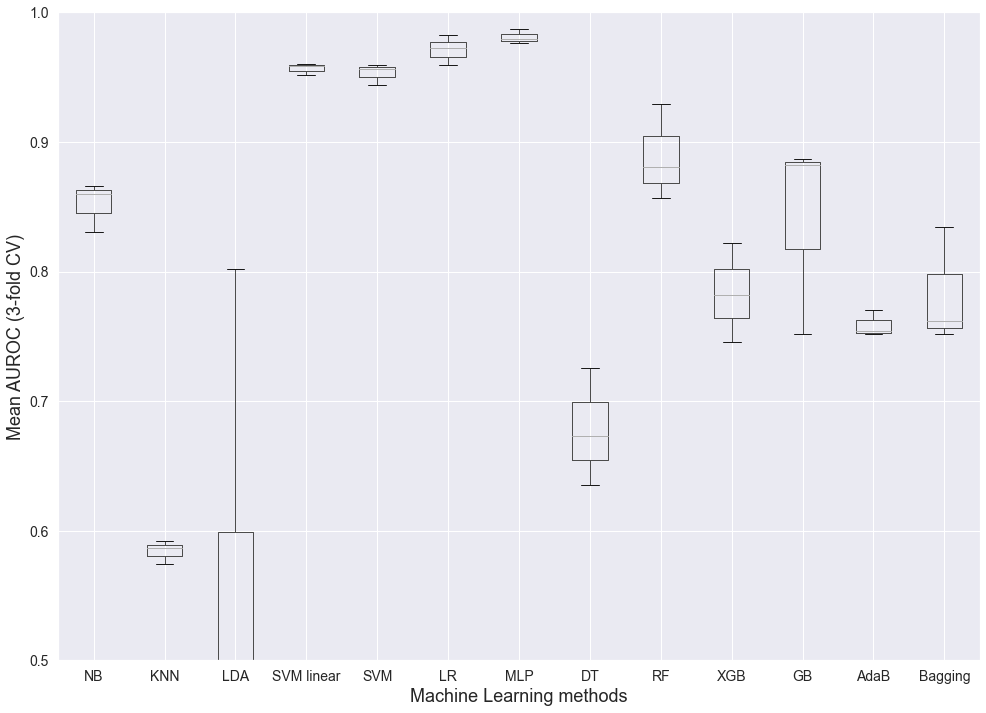

==>>> Seed= 14

Running iteration 14/50 with seed 14

-> Read dataset ./datasets/Mix_BreastCancer.csv

-> Modify dataset
Done!

-> Drop ProtID column
Done!

-> Dataset preprocessing
Inicial shape: (376, 8741)
Data points = 376
Columns (output + features)= 8741
Data types = [dtype('float64') dtype('int64')]


Column Names:
 Index(['A', 'R', 'N', 'D', 'C', 'E', 'Q', 'G', 'H', 'I',
       ...
       'DAYM780201.lag22', 'DAYM780201.lag23', 'DAYM780201.lag24',
       'DAYM780201.lag25', 'DAYM780201.lag26', 'DAYM780201.lag27',
       'DAYM780201.lag28', 'DAYM780201.lag29', 'DAYM780201.lag30', 'Class'],
      dtype='object', length=8741)
Categorical features: []
Columns with NaN:  0  /  8741
No of data points with NaN: 0  /  376
* Remove duplicates
Final shape: (376, 8741)
Done!

-> Get X & Y data, Features list
Shape (376, 8741)
Shape X data: (376, 8740)
Shape Y data: (376,)
Done!

-> Remove zero variance features
Removed features: ['WQM', 'CMH', 'CNW', 'WIW', 'WCK', 'YCW', 'WGC', 'MWH', 'IW

<Figure size 432x288 with 0 Axes>

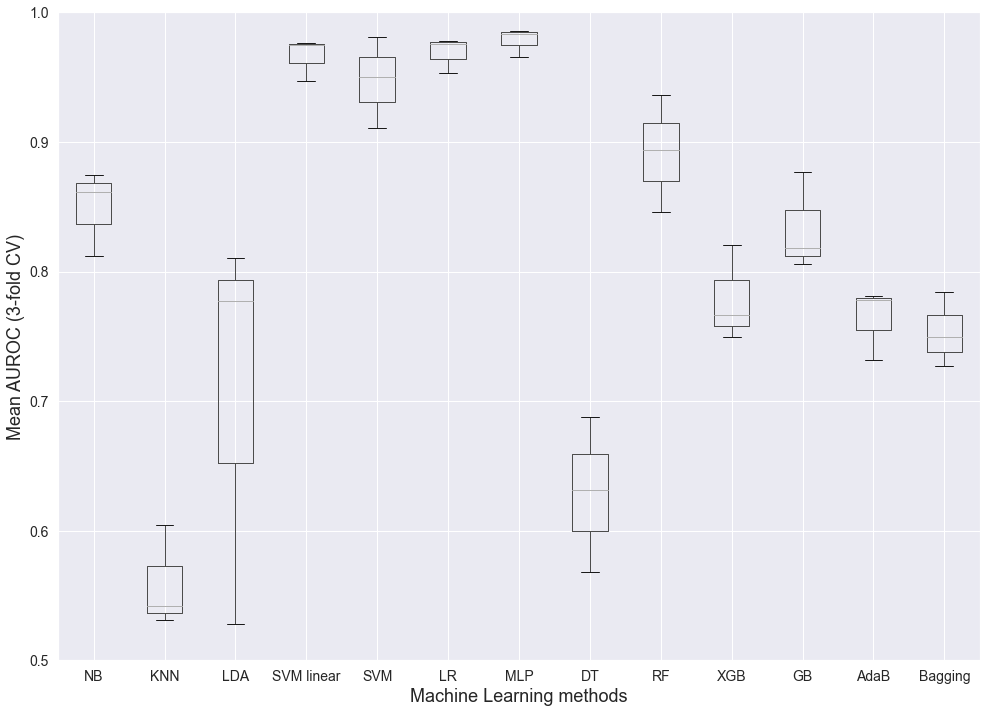

==>>> Seed= 15

Running iteration 15/50 with seed 15

-> Read dataset ./datasets/Mix_BreastCancer.csv

-> Modify dataset
Done!

-> Drop ProtID column
Done!

-> Dataset preprocessing
Inicial shape: (376, 8741)
Data points = 376
Columns (output + features)= 8741
Data types = [dtype('float64') dtype('int64')]


Column Names:
 Index(['A', 'R', 'N', 'D', 'C', 'E', 'Q', 'G', 'H', 'I',
       ...
       'DAYM780201.lag22', 'DAYM780201.lag23', 'DAYM780201.lag24',
       'DAYM780201.lag25', 'DAYM780201.lag26', 'DAYM780201.lag27',
       'DAYM780201.lag28', 'DAYM780201.lag29', 'DAYM780201.lag30', 'Class'],
      dtype='object', length=8741)
Categorical features: []
Columns with NaN:  0  /  8741
No of data points with NaN: 0  /  376
* Remove duplicates
Final shape: (376, 8741)
Done!

-> Get X & Y data, Features list
Shape (376, 8741)
Shape X data: (376, 8740)
Shape Y data: (376,)
Done!

-> Remove zero variance features
Removed features: ['WQM', 'CMH', 'CNW', 'WIW', 'WCK', 'YCW', 'WGC', 'MWH', 'IW

<Figure size 432x288 with 0 Axes>

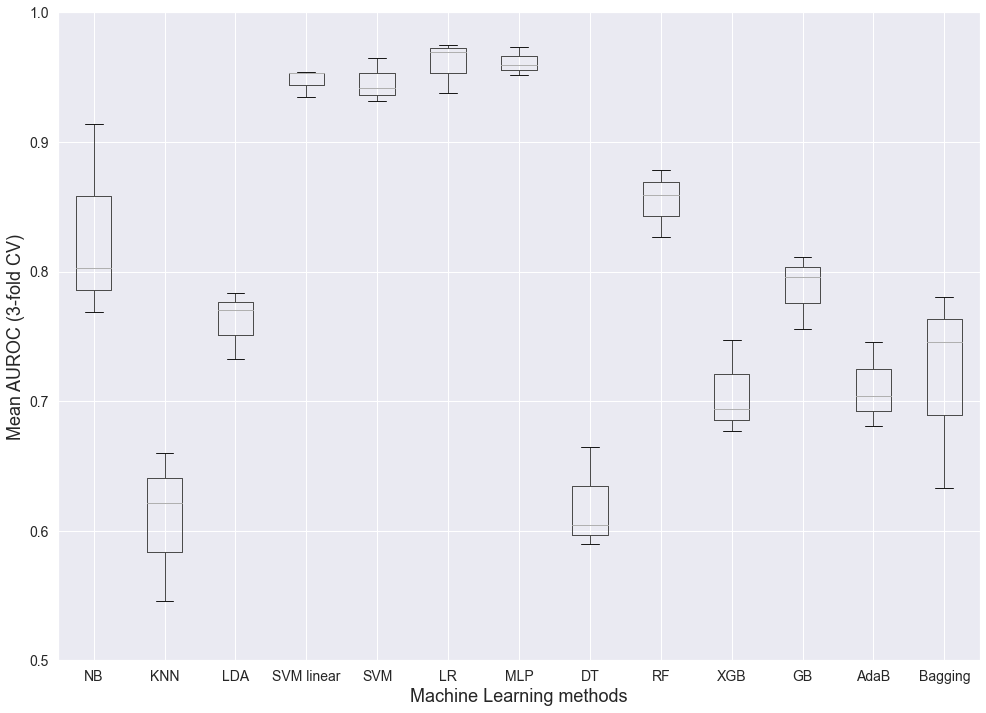

==>>> Seed= 16

Running iteration 16/50 with seed 16

-> Read dataset ./datasets/Mix_BreastCancer.csv

-> Modify dataset
Done!

-> Drop ProtID column
Done!

-> Dataset preprocessing
Inicial shape: (376, 8741)
Data points = 376
Columns (output + features)= 8741
Data types = [dtype('float64') dtype('int64')]


Column Names:
 Index(['A', 'R', 'N', 'D', 'C', 'E', 'Q', 'G', 'H', 'I',
       ...
       'DAYM780201.lag22', 'DAYM780201.lag23', 'DAYM780201.lag24',
       'DAYM780201.lag25', 'DAYM780201.lag26', 'DAYM780201.lag27',
       'DAYM780201.lag28', 'DAYM780201.lag29', 'DAYM780201.lag30', 'Class'],
      dtype='object', length=8741)
Categorical features: []
Columns with NaN:  0  /  8741
No of data points with NaN: 0  /  376
* Remove duplicates
Final shape: (376, 8741)
Done!

-> Get X & Y data, Features list
Shape (376, 8741)
Shape X data: (376, 8740)
Shape Y data: (376,)
Done!

-> Remove zero variance features
Removed features: ['WQM', 'CMH', 'CNW', 'WIW', 'WCK', 'YCW', 'WGC', 'MWH', 'IW

<Figure size 432x288 with 0 Axes>

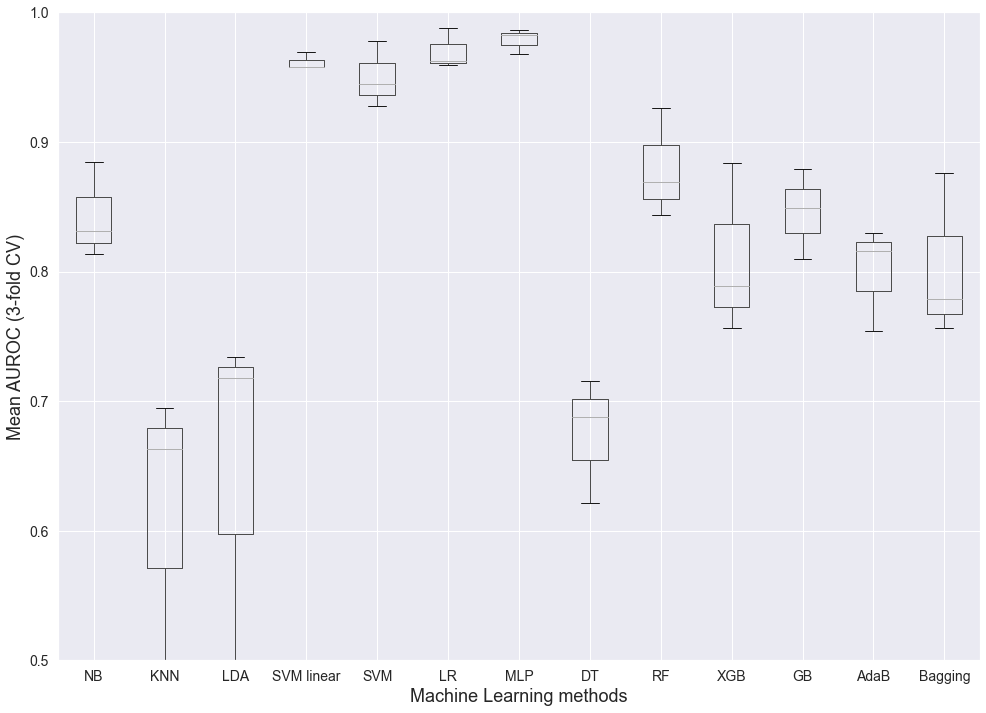

==>>> Seed= 17

Running iteration 17/50 with seed 17

-> Read dataset ./datasets/Mix_BreastCancer.csv

-> Modify dataset
Done!

-> Drop ProtID column
Done!

-> Dataset preprocessing
Inicial shape: (376, 8741)
Data points = 376
Columns (output + features)= 8741
Data types = [dtype('float64') dtype('int64')]


Column Names:
 Index(['A', 'R', 'N', 'D', 'C', 'E', 'Q', 'G', 'H', 'I',
       ...
       'DAYM780201.lag22', 'DAYM780201.lag23', 'DAYM780201.lag24',
       'DAYM780201.lag25', 'DAYM780201.lag26', 'DAYM780201.lag27',
       'DAYM780201.lag28', 'DAYM780201.lag29', 'DAYM780201.lag30', 'Class'],
      dtype='object', length=8741)
Categorical features: []
Columns with NaN:  0  /  8741
No of data points with NaN: 0  /  376
* Remove duplicates
Final shape: (376, 8741)
Done!

-> Get X & Y data, Features list
Shape (376, 8741)
Shape X data: (376, 8740)
Shape Y data: (376,)
Done!

-> Remove zero variance features
Removed features: ['WQM', 'CMH', 'CNW', 'WIW', 'WCK', 'YCW', 'WGC', 'MWH', 'IW

<Figure size 432x288 with 0 Axes>

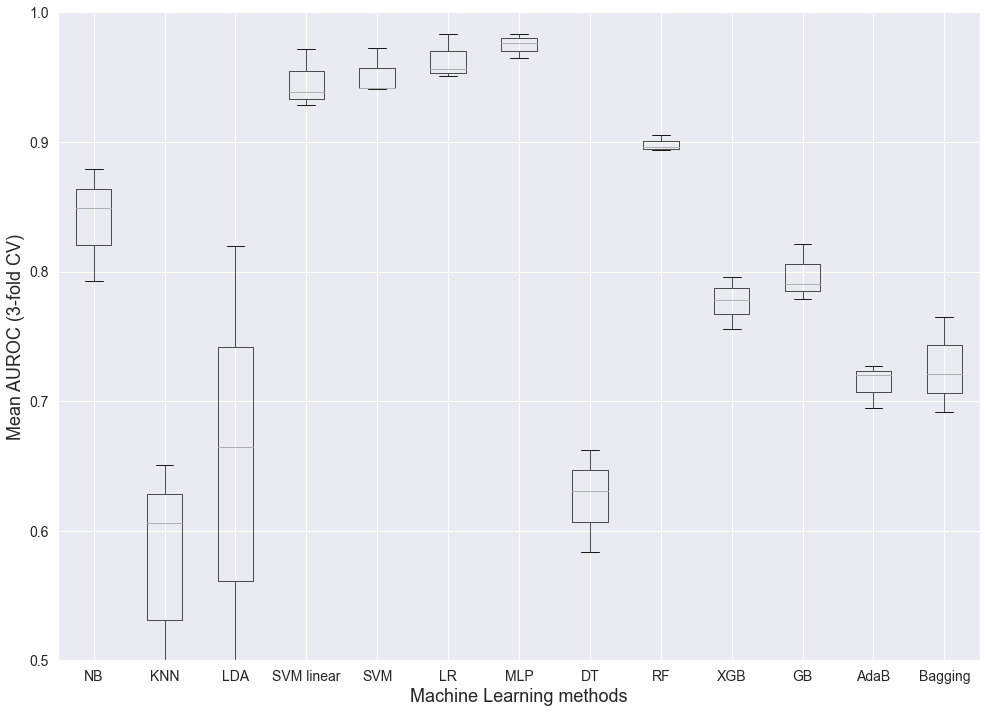

==>>> Seed= 18

Running iteration 18/50 with seed 18

-> Read dataset ./datasets/Mix_BreastCancer.csv

-> Modify dataset
Done!

-> Drop ProtID column
Done!

-> Dataset preprocessing
Inicial shape: (376, 8741)
Data points = 376
Columns (output + features)= 8741
Data types = [dtype('float64') dtype('int64')]


Column Names:
 Index(['A', 'R', 'N', 'D', 'C', 'E', 'Q', 'G', 'H', 'I',
       ...
       'DAYM780201.lag22', 'DAYM780201.lag23', 'DAYM780201.lag24',
       'DAYM780201.lag25', 'DAYM780201.lag26', 'DAYM780201.lag27',
       'DAYM780201.lag28', 'DAYM780201.lag29', 'DAYM780201.lag30', 'Class'],
      dtype='object', length=8741)
Categorical features: []
Columns with NaN:  0  /  8741
No of data points with NaN: 0  /  376
* Remove duplicates
Final shape: (376, 8741)
Done!

-> Get X & Y data, Features list
Shape (376, 8741)
Shape X data: (376, 8740)
Shape Y data: (376,)
Done!

-> Remove zero variance features
Removed features: ['WQM', 'CMH', 'CNW', 'WIW', 'WCK', 'YCW', 'WGC', 'MWH', 'IW

<Figure size 432x288 with 0 Axes>

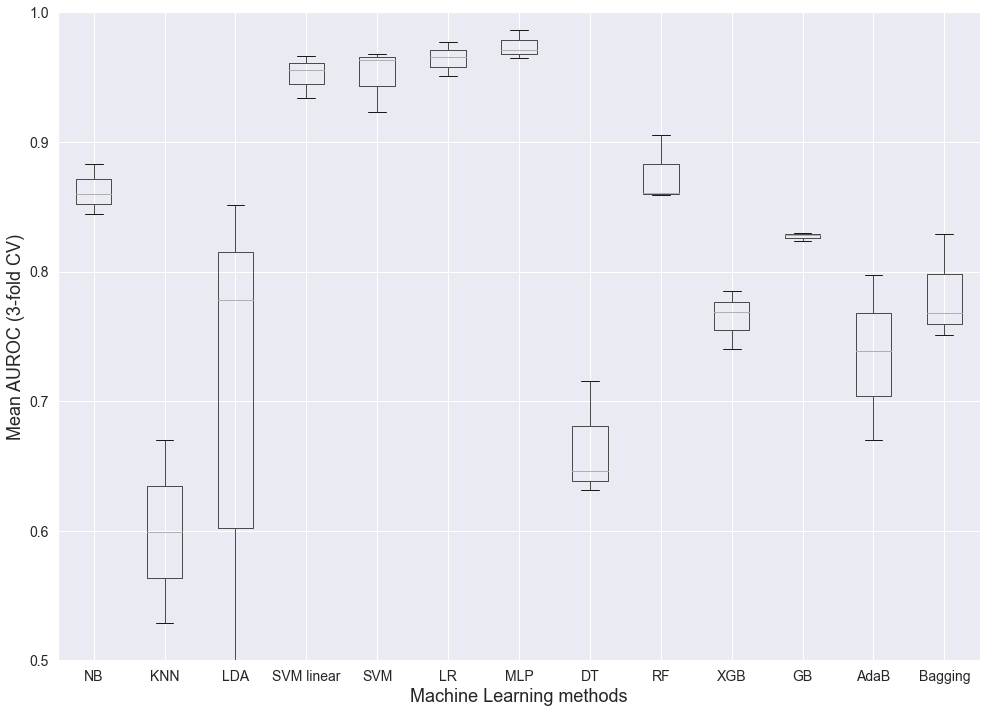

==>>> Seed= 19

Running iteration 19/50 with seed 19

-> Read dataset ./datasets/Mix_BreastCancer.csv

-> Modify dataset
Done!

-> Drop ProtID column
Done!

-> Dataset preprocessing
Inicial shape: (376, 8741)
Data points = 376
Columns (output + features)= 8741
Data types = [dtype('float64') dtype('int64')]


Column Names:
 Index(['A', 'R', 'N', 'D', 'C', 'E', 'Q', 'G', 'H', 'I',
       ...
       'DAYM780201.lag22', 'DAYM780201.lag23', 'DAYM780201.lag24',
       'DAYM780201.lag25', 'DAYM780201.lag26', 'DAYM780201.lag27',
       'DAYM780201.lag28', 'DAYM780201.lag29', 'DAYM780201.lag30', 'Class'],
      dtype='object', length=8741)
Categorical features: []
Columns with NaN:  0  /  8741
No of data points with NaN: 0  /  376
* Remove duplicates
Final shape: (376, 8741)
Done!

-> Get X & Y data, Features list
Shape (376, 8741)
Shape X data: (376, 8740)
Shape Y data: (376,)
Done!

-> Remove zero variance features
Removed features: ['WQM', 'CMH', 'CNW', 'WIW', 'WCK', 'YCW', 'WGC', 'MWH', 'IW

<Figure size 432x288 with 0 Axes>

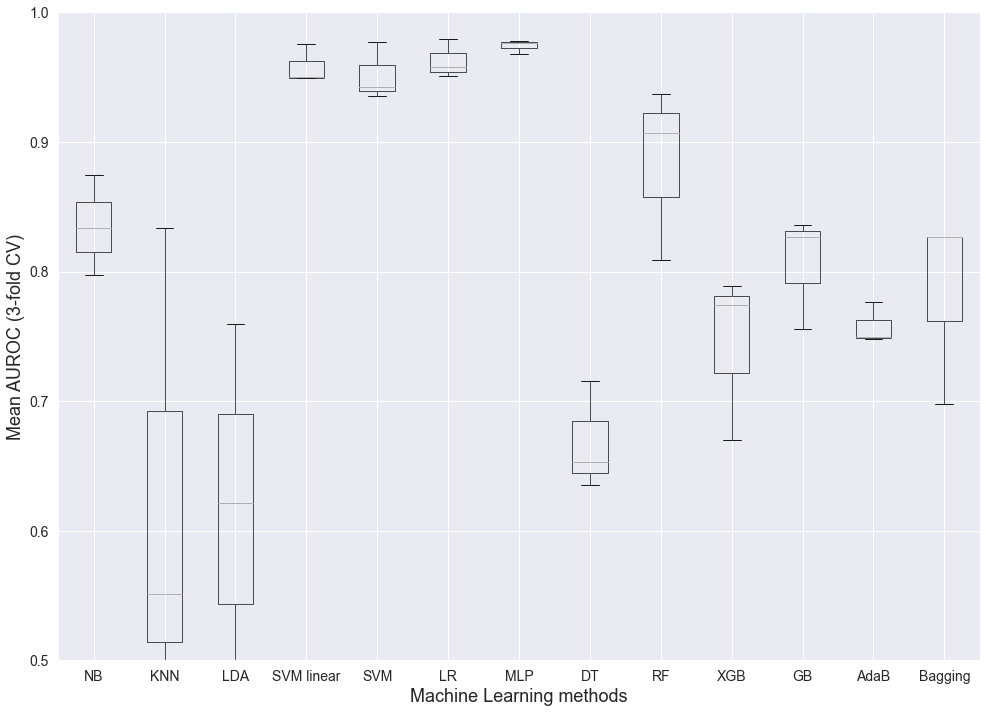

==>>> Seed= 20

Running iteration 20/50 with seed 20

-> Read dataset ./datasets/Mix_BreastCancer.csv

-> Modify dataset
Done!

-> Drop ProtID column
Done!

-> Dataset preprocessing
Inicial shape: (376, 8741)
Data points = 376
Columns (output + features)= 8741
Data types = [dtype('float64') dtype('int64')]


Column Names:
 Index(['A', 'R', 'N', 'D', 'C', 'E', 'Q', 'G', 'H', 'I',
       ...
       'DAYM780201.lag22', 'DAYM780201.lag23', 'DAYM780201.lag24',
       'DAYM780201.lag25', 'DAYM780201.lag26', 'DAYM780201.lag27',
       'DAYM780201.lag28', 'DAYM780201.lag29', 'DAYM780201.lag30', 'Class'],
      dtype='object', length=8741)
Categorical features: []
Columns with NaN:  0  /  8741
No of data points with NaN: 0  /  376
* Remove duplicates
Final shape: (376, 8741)
Done!

-> Get X & Y data, Features list
Shape (376, 8741)
Shape X data: (376, 8740)
Shape Y data: (376,)
Done!

-> Remove zero variance features
Removed features: ['WQM', 'CMH', 'CNW', 'WIW', 'WCK', 'YCW', 'WGC', 'MWH', 'IW

<Figure size 432x288 with 0 Axes>

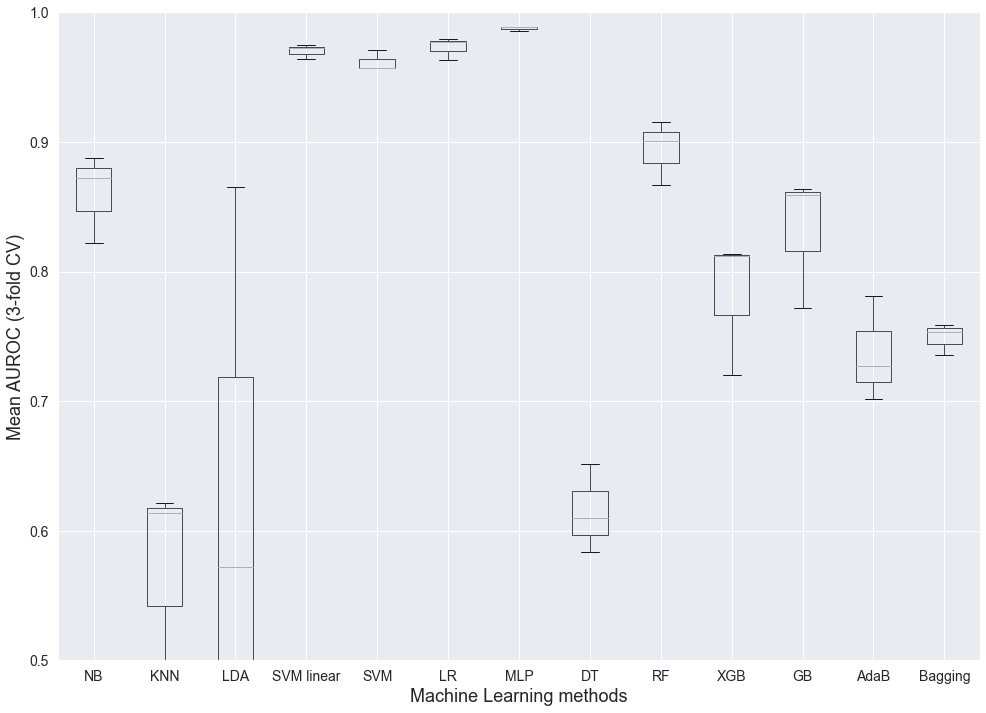

==>>> Seed= 21

Running iteration 21/50 with seed 21

-> Read dataset ./datasets/Mix_BreastCancer.csv

-> Modify dataset
Done!

-> Drop ProtID column
Done!

-> Dataset preprocessing
Inicial shape: (376, 8741)
Data points = 376
Columns (output + features)= 8741
Data types = [dtype('float64') dtype('int64')]


Column Names:
 Index(['A', 'R', 'N', 'D', 'C', 'E', 'Q', 'G', 'H', 'I',
       ...
       'DAYM780201.lag22', 'DAYM780201.lag23', 'DAYM780201.lag24',
       'DAYM780201.lag25', 'DAYM780201.lag26', 'DAYM780201.lag27',
       'DAYM780201.lag28', 'DAYM780201.lag29', 'DAYM780201.lag30', 'Class'],
      dtype='object', length=8741)
Categorical features: []
Columns with NaN:  0  /  8741
No of data points with NaN: 0  /  376
* Remove duplicates
Final shape: (376, 8741)
Done!

-> Get X & Y data, Features list
Shape (376, 8741)
Shape X data: (376, 8740)
Shape Y data: (376,)
Done!

-> Remove zero variance features
Removed features: ['WQM', 'CMH', 'CNW', 'WIW', 'WCK', 'YCW', 'WGC', 'MWH', 'IW

<Figure size 432x288 with 0 Axes>

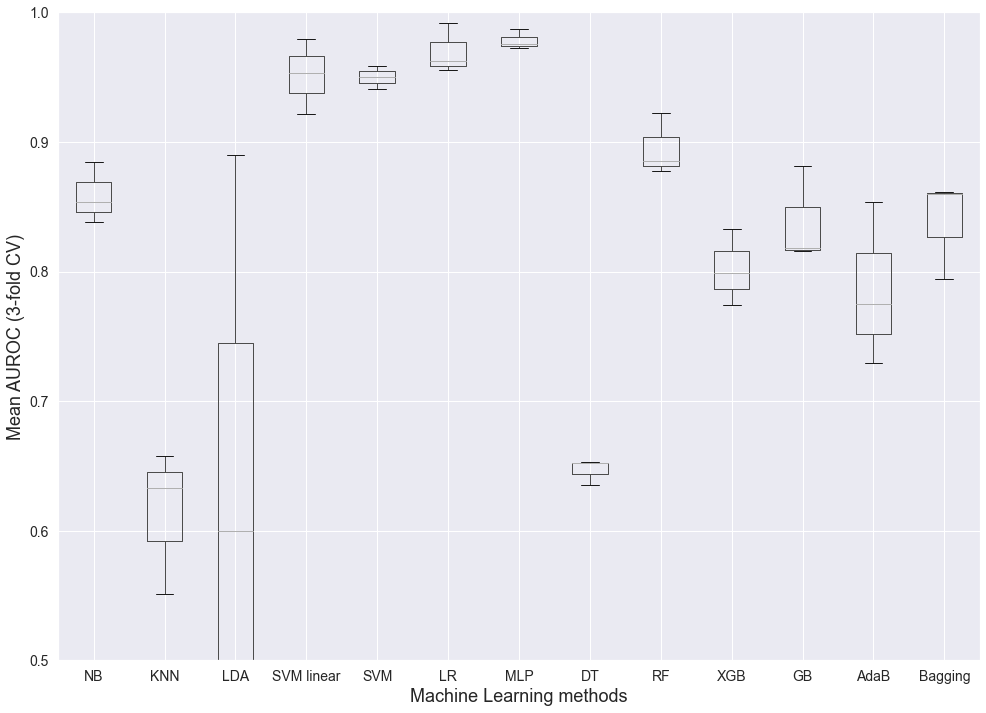

==>>> Seed= 22

Running iteration 22/50 with seed 22

-> Read dataset ./datasets/Mix_BreastCancer.csv

-> Modify dataset
Done!

-> Drop ProtID column
Done!

-> Dataset preprocessing
Inicial shape: (376, 8741)
Data points = 376
Columns (output + features)= 8741
Data types = [dtype('float64') dtype('int64')]


Column Names:
 Index(['A', 'R', 'N', 'D', 'C', 'E', 'Q', 'G', 'H', 'I',
       ...
       'DAYM780201.lag22', 'DAYM780201.lag23', 'DAYM780201.lag24',
       'DAYM780201.lag25', 'DAYM780201.lag26', 'DAYM780201.lag27',
       'DAYM780201.lag28', 'DAYM780201.lag29', 'DAYM780201.lag30', 'Class'],
      dtype='object', length=8741)
Categorical features: []
Columns with NaN:  0  /  8741
No of data points with NaN: 0  /  376
* Remove duplicates
Final shape: (376, 8741)
Done!

-> Get X & Y data, Features list
Shape (376, 8741)
Shape X data: (376, 8740)
Shape Y data: (376,)
Done!

-> Remove zero variance features
Removed features: ['WQM', 'CMH', 'CNW', 'WIW', 'WCK', 'YCW', 'WGC', 'MWH', 'IW

<Figure size 432x288 with 0 Axes>

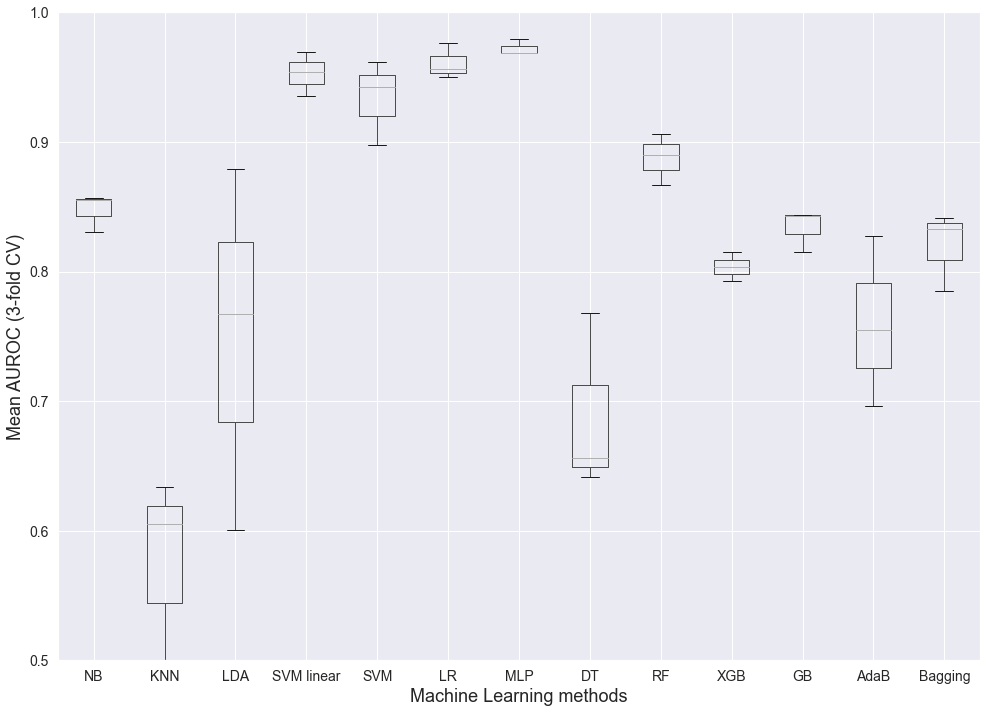

==>>> Seed= 23

Running iteration 23/50 with seed 23

-> Read dataset ./datasets/Mix_BreastCancer.csv

-> Modify dataset
Done!

-> Drop ProtID column
Done!

-> Dataset preprocessing
Inicial shape: (376, 8741)
Data points = 376
Columns (output + features)= 8741
Data types = [dtype('float64') dtype('int64')]


Column Names:
 Index(['A', 'R', 'N', 'D', 'C', 'E', 'Q', 'G', 'H', 'I',
       ...
       'DAYM780201.lag22', 'DAYM780201.lag23', 'DAYM780201.lag24',
       'DAYM780201.lag25', 'DAYM780201.lag26', 'DAYM780201.lag27',
       'DAYM780201.lag28', 'DAYM780201.lag29', 'DAYM780201.lag30', 'Class'],
      dtype='object', length=8741)
Categorical features: []
Columns with NaN:  0  /  8741
No of data points with NaN: 0  /  376
* Remove duplicates
Final shape: (376, 8741)
Done!

-> Get X & Y data, Features list
Shape (376, 8741)
Shape X data: (376, 8740)
Shape Y data: (376,)
Done!

-> Remove zero variance features
Removed features: ['WQM', 'CMH', 'CNW', 'WIW', 'WCK', 'YCW', 'WGC', 'MWH', 'IW

<Figure size 432x288 with 0 Axes>

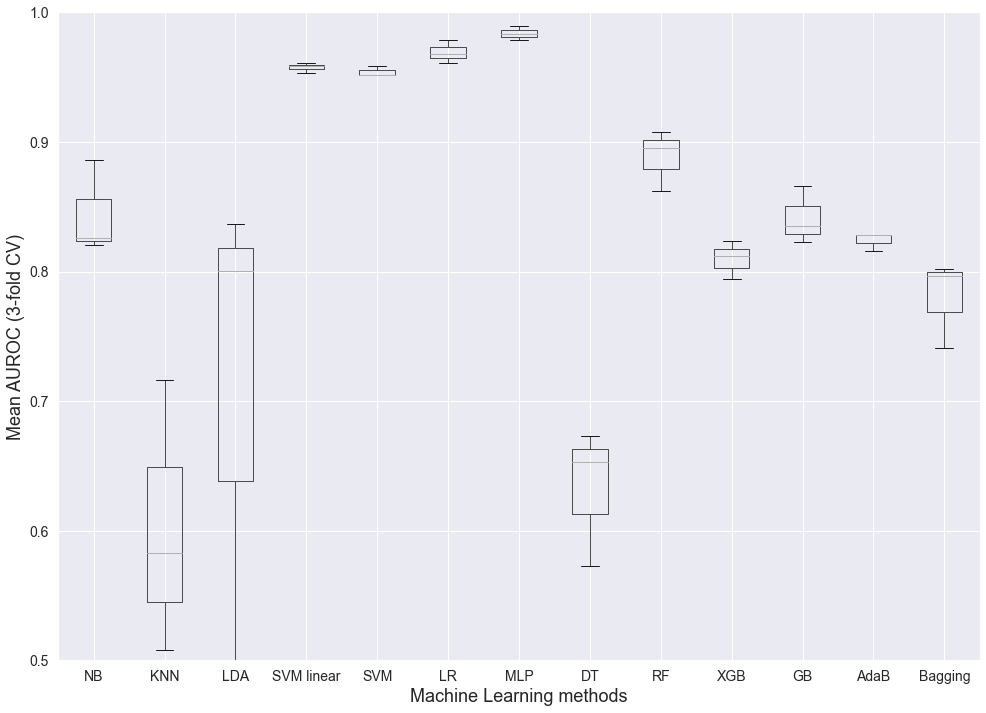

==>>> Seed= 24

Running iteration 24/50 with seed 24

-> Read dataset ./datasets/Mix_BreastCancer.csv

-> Modify dataset
Done!

-> Drop ProtID column
Done!

-> Dataset preprocessing
Inicial shape: (376, 8741)
Data points = 376
Columns (output + features)= 8741
Data types = [dtype('float64') dtype('int64')]


Column Names:
 Index(['A', 'R', 'N', 'D', 'C', 'E', 'Q', 'G', 'H', 'I',
       ...
       'DAYM780201.lag22', 'DAYM780201.lag23', 'DAYM780201.lag24',
       'DAYM780201.lag25', 'DAYM780201.lag26', 'DAYM780201.lag27',
       'DAYM780201.lag28', 'DAYM780201.lag29', 'DAYM780201.lag30', 'Class'],
      dtype='object', length=8741)
Categorical features: []
Columns with NaN:  0  /  8741
No of data points with NaN: 0  /  376
* Remove duplicates
Final shape: (376, 8741)
Done!

-> Get X & Y data, Features list
Shape (376, 8741)
Shape X data: (376, 8740)
Shape Y data: (376,)
Done!

-> Remove zero variance features
Removed features: ['WQM', 'CMH', 'CNW', 'WIW', 'WCK', 'YCW', 'WGC', 'MWH', 'IW

<Figure size 432x288 with 0 Axes>

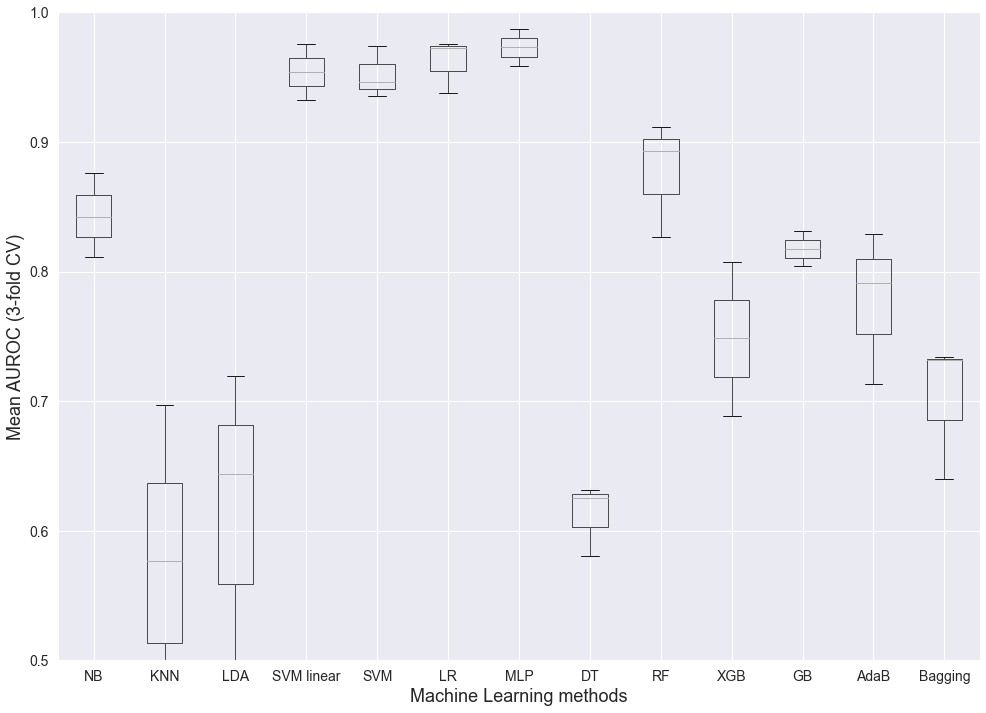

==>>> Seed= 25

Running iteration 25/50 with seed 25

-> Read dataset ./datasets/Mix_BreastCancer.csv

-> Modify dataset
Done!

-> Drop ProtID column
Done!

-> Dataset preprocessing
Inicial shape: (376, 8741)
Data points = 376
Columns (output + features)= 8741
Data types = [dtype('float64') dtype('int64')]


Column Names:
 Index(['A', 'R', 'N', 'D', 'C', 'E', 'Q', 'G', 'H', 'I',
       ...
       'DAYM780201.lag22', 'DAYM780201.lag23', 'DAYM780201.lag24',
       'DAYM780201.lag25', 'DAYM780201.lag26', 'DAYM780201.lag27',
       'DAYM780201.lag28', 'DAYM780201.lag29', 'DAYM780201.lag30', 'Class'],
      dtype='object', length=8741)
Categorical features: []
Columns with NaN:  0  /  8741
No of data points with NaN: 0  /  376
* Remove duplicates
Final shape: (376, 8741)
Done!

-> Get X & Y data, Features list
Shape (376, 8741)
Shape X data: (376, 8740)
Shape Y data: (376,)
Done!

-> Remove zero variance features
Removed features: ['WQM', 'CMH', 'CNW', 'WIW', 'WCK', 'YCW', 'WGC', 'MWH', 'IW

<Figure size 432x288 with 0 Axes>

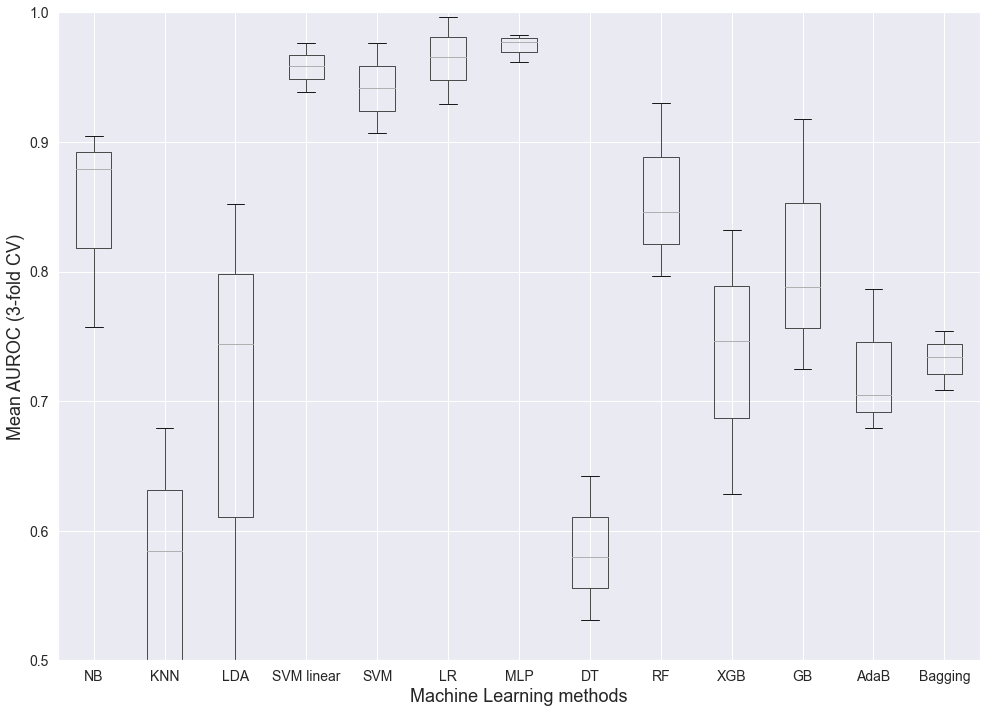

==>>> Seed= 26

Running iteration 26/50 with seed 26

-> Read dataset ./datasets/Mix_BreastCancer.csv

-> Modify dataset
Done!

-> Drop ProtID column
Done!

-> Dataset preprocessing
Inicial shape: (376, 8741)
Data points = 376
Columns (output + features)= 8741
Data types = [dtype('float64') dtype('int64')]


Column Names:
 Index(['A', 'R', 'N', 'D', 'C', 'E', 'Q', 'G', 'H', 'I',
       ...
       'DAYM780201.lag22', 'DAYM780201.lag23', 'DAYM780201.lag24',
       'DAYM780201.lag25', 'DAYM780201.lag26', 'DAYM780201.lag27',
       'DAYM780201.lag28', 'DAYM780201.lag29', 'DAYM780201.lag30', 'Class'],
      dtype='object', length=8741)
Categorical features: []
Columns with NaN:  0  /  8741
No of data points with NaN: 0  /  376
* Remove duplicates
Final shape: (376, 8741)
Done!

-> Get X & Y data, Features list
Shape (376, 8741)
Shape X data: (376, 8740)
Shape Y data: (376,)
Done!

-> Remove zero variance features
Removed features: ['WQM', 'CMH', 'CNW', 'WIW', 'WCK', 'YCW', 'WGC', 'MWH', 'IW

<Figure size 432x288 with 0 Axes>

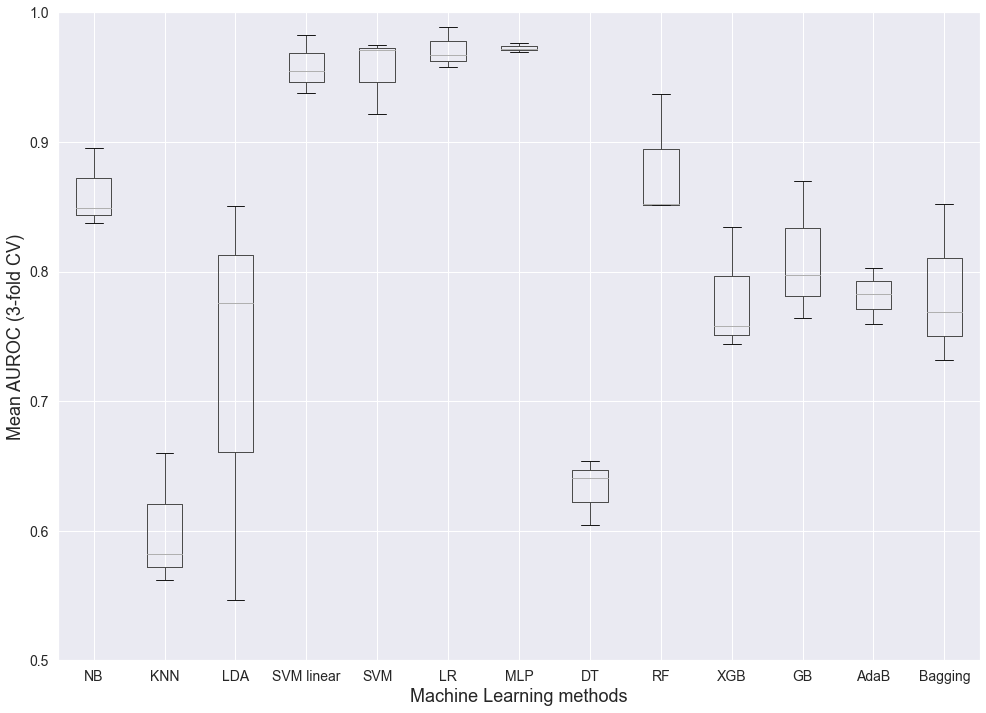

==>>> Seed= 27

Running iteration 27/50 with seed 27

-> Read dataset ./datasets/Mix_BreastCancer.csv

-> Modify dataset
Done!

-> Drop ProtID column
Done!

-> Dataset preprocessing
Inicial shape: (376, 8741)
Data points = 376
Columns (output + features)= 8741
Data types = [dtype('float64') dtype('int64')]


Column Names:
 Index(['A', 'R', 'N', 'D', 'C', 'E', 'Q', 'G', 'H', 'I',
       ...
       'DAYM780201.lag22', 'DAYM780201.lag23', 'DAYM780201.lag24',
       'DAYM780201.lag25', 'DAYM780201.lag26', 'DAYM780201.lag27',
       'DAYM780201.lag28', 'DAYM780201.lag29', 'DAYM780201.lag30', 'Class'],
      dtype='object', length=8741)
Categorical features: []
Columns with NaN:  0  /  8741
No of data points with NaN: 0  /  376
* Remove duplicates
Final shape: (376, 8741)
Done!

-> Get X & Y data, Features list
Shape (376, 8741)
Shape X data: (376, 8740)
Shape Y data: (376,)
Done!

-> Remove zero variance features
Removed features: ['WQM', 'CMH', 'CNW', 'WIW', 'WCK', 'YCW', 'WGC', 'MWH', 'IW

<Figure size 432x288 with 0 Axes>

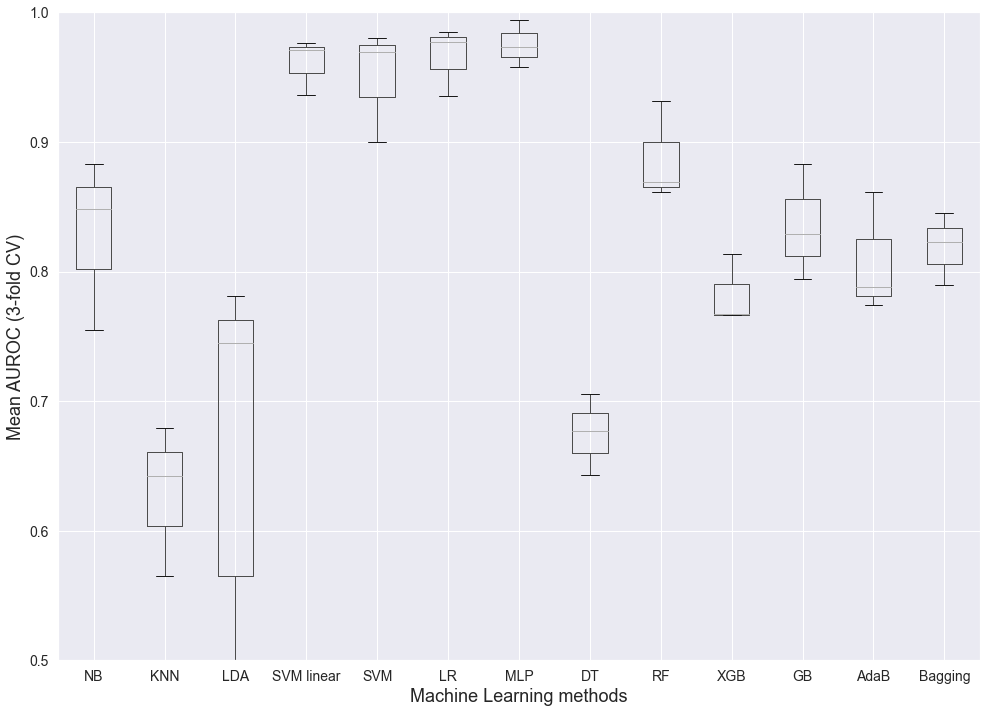

==>>> Seed= 28

Running iteration 28/50 with seed 28

-> Read dataset ./datasets/Mix_BreastCancer.csv

-> Modify dataset
Done!

-> Drop ProtID column
Done!

-> Dataset preprocessing
Inicial shape: (376, 8741)
Data points = 376
Columns (output + features)= 8741
Data types = [dtype('float64') dtype('int64')]


Column Names:
 Index(['A', 'R', 'N', 'D', 'C', 'E', 'Q', 'G', 'H', 'I',
       ...
       'DAYM780201.lag22', 'DAYM780201.lag23', 'DAYM780201.lag24',
       'DAYM780201.lag25', 'DAYM780201.lag26', 'DAYM780201.lag27',
       'DAYM780201.lag28', 'DAYM780201.lag29', 'DAYM780201.lag30', 'Class'],
      dtype='object', length=8741)
Categorical features: []
Columns with NaN:  0  /  8741
No of data points with NaN: 0  /  376
* Remove duplicates
Final shape: (376, 8741)
Done!

-> Get X & Y data, Features list
Shape (376, 8741)
Shape X data: (376, 8740)
Shape Y data: (376,)
Done!

-> Remove zero variance features
Removed features: ['WQM', 'CMH', 'CNW', 'WIW', 'WCK', 'YCW', 'WGC', 'MWH', 'IW

<Figure size 432x288 with 0 Axes>

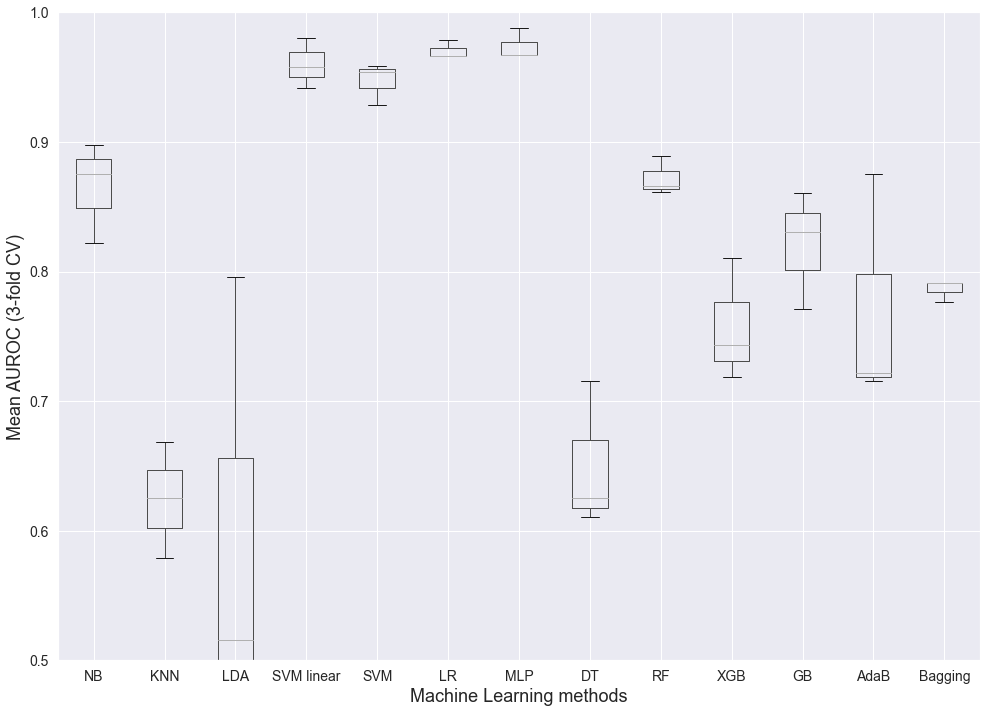

==>>> Seed= 29

Running iteration 29/50 with seed 29

-> Read dataset ./datasets/Mix_BreastCancer.csv

-> Modify dataset
Done!

-> Drop ProtID column
Done!

-> Dataset preprocessing
Inicial shape: (376, 8741)
Data points = 376
Columns (output + features)= 8741
Data types = [dtype('float64') dtype('int64')]


Column Names:
 Index(['A', 'R', 'N', 'D', 'C', 'E', 'Q', 'G', 'H', 'I',
       ...
       'DAYM780201.lag22', 'DAYM780201.lag23', 'DAYM780201.lag24',
       'DAYM780201.lag25', 'DAYM780201.lag26', 'DAYM780201.lag27',
       'DAYM780201.lag28', 'DAYM780201.lag29', 'DAYM780201.lag30', 'Class'],
      dtype='object', length=8741)
Categorical features: []
Columns with NaN:  0  /  8741
No of data points with NaN: 0  /  376
* Remove duplicates
Final shape: (376, 8741)
Done!

-> Get X & Y data, Features list
Shape (376, 8741)
Shape X data: (376, 8740)
Shape Y data: (376,)
Done!

-> Remove zero variance features
Removed features: ['WQM', 'CMH', 'CNW', 'WIW', 'WCK', 'YCW', 'WGC', 'MWH', 'IW

<Figure size 432x288 with 0 Axes>

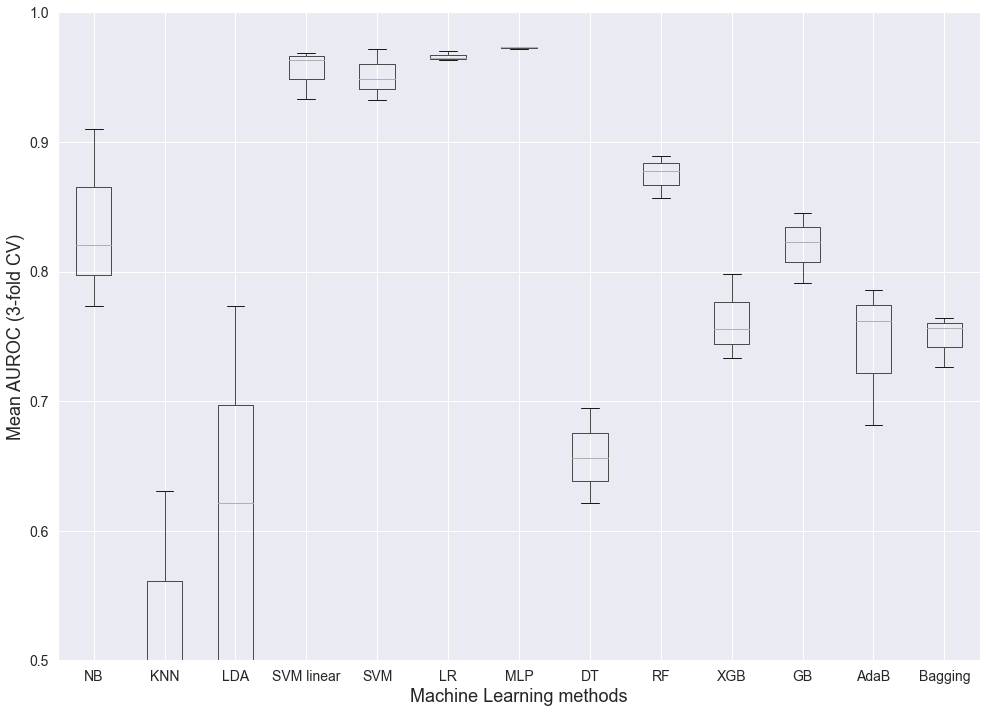

==>>> Seed= 30

Running iteration 30/50 with seed 30

-> Read dataset ./datasets/Mix_BreastCancer.csv

-> Modify dataset
Done!

-> Drop ProtID column
Done!

-> Dataset preprocessing
Inicial shape: (376, 8741)
Data points = 376
Columns (output + features)= 8741
Data types = [dtype('float64') dtype('int64')]


Column Names:
 Index(['A', 'R', 'N', 'D', 'C', 'E', 'Q', 'G', 'H', 'I',
       ...
       'DAYM780201.lag22', 'DAYM780201.lag23', 'DAYM780201.lag24',
       'DAYM780201.lag25', 'DAYM780201.lag26', 'DAYM780201.lag27',
       'DAYM780201.lag28', 'DAYM780201.lag29', 'DAYM780201.lag30', 'Class'],
      dtype='object', length=8741)
Categorical features: []
Columns with NaN:  0  /  8741
No of data points with NaN: 0  /  376
* Remove duplicates
Final shape: (376, 8741)
Done!

-> Get X & Y data, Features list
Shape (376, 8741)
Shape X data: (376, 8740)
Shape Y data: (376,)
Done!

-> Remove zero variance features
Removed features: ['WQM', 'CMH', 'CNW', 'WIW', 'WCK', 'YCW', 'WGC', 'MWH', 'IW

<Figure size 432x288 with 0 Axes>

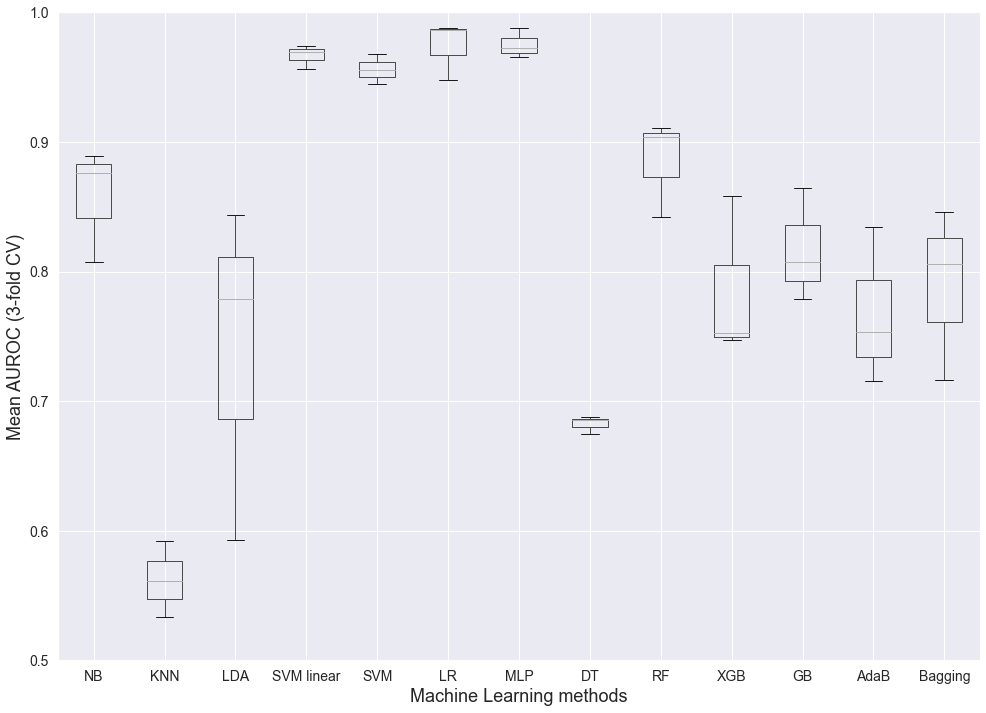

==>>> Seed= 31

Running iteration 31/50 with seed 31

-> Read dataset ./datasets/Mix_BreastCancer.csv

-> Modify dataset
Done!

-> Drop ProtID column
Done!

-> Dataset preprocessing
Inicial shape: (376, 8741)
Data points = 376
Columns (output + features)= 8741
Data types = [dtype('float64') dtype('int64')]


Column Names:
 Index(['A', 'R', 'N', 'D', 'C', 'E', 'Q', 'G', 'H', 'I',
       ...
       'DAYM780201.lag22', 'DAYM780201.lag23', 'DAYM780201.lag24',
       'DAYM780201.lag25', 'DAYM780201.lag26', 'DAYM780201.lag27',
       'DAYM780201.lag28', 'DAYM780201.lag29', 'DAYM780201.lag30', 'Class'],
      dtype='object', length=8741)
Categorical features: []
Columns with NaN:  0  /  8741
No of data points with NaN: 0  /  376
* Remove duplicates
Final shape: (376, 8741)
Done!

-> Get X & Y data, Features list
Shape (376, 8741)
Shape X data: (376, 8740)
Shape Y data: (376,)
Done!

-> Remove zero variance features
Removed features: ['WQM', 'CMH', 'CNW', 'WIW', 'WCK', 'YCW', 'WGC', 'MWH', 'IW

<Figure size 432x288 with 0 Axes>

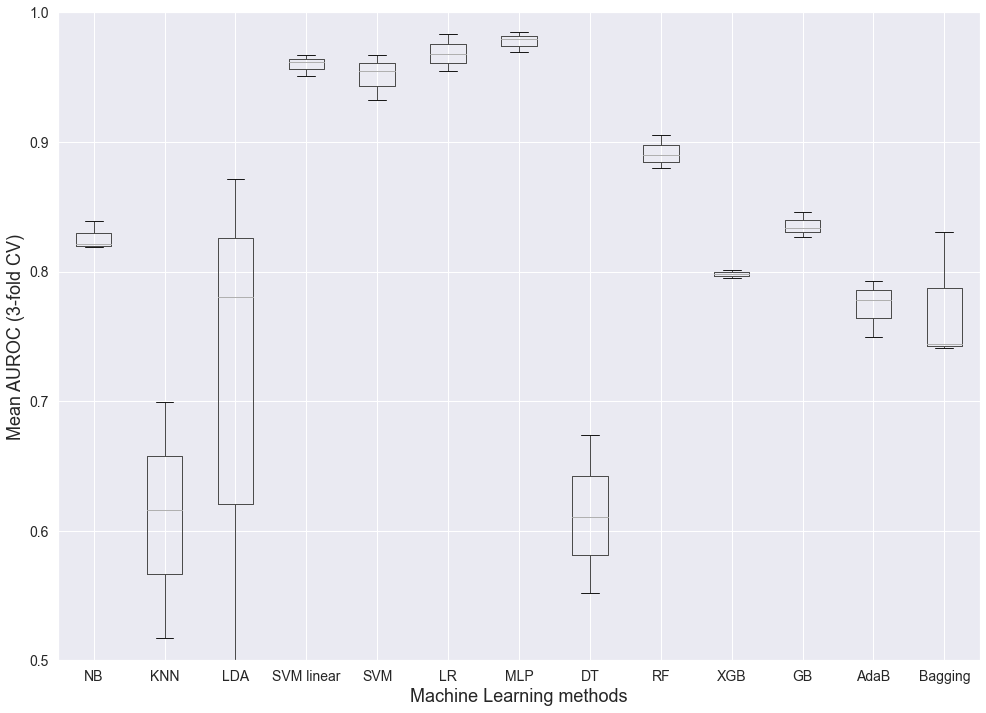

==>>> Seed= 32

Running iteration 32/50 with seed 32

-> Read dataset ./datasets/Mix_BreastCancer.csv

-> Modify dataset
Done!

-> Drop ProtID column
Done!

-> Dataset preprocessing
Inicial shape: (376, 8741)
Data points = 376
Columns (output + features)= 8741
Data types = [dtype('float64') dtype('int64')]


Column Names:
 Index(['A', 'R', 'N', 'D', 'C', 'E', 'Q', 'G', 'H', 'I',
       ...
       'DAYM780201.lag22', 'DAYM780201.lag23', 'DAYM780201.lag24',
       'DAYM780201.lag25', 'DAYM780201.lag26', 'DAYM780201.lag27',
       'DAYM780201.lag28', 'DAYM780201.lag29', 'DAYM780201.lag30', 'Class'],
      dtype='object', length=8741)
Categorical features: []
Columns with NaN:  0  /  8741
No of data points with NaN: 0  /  376
* Remove duplicates
Final shape: (376, 8741)
Done!

-> Get X & Y data, Features list
Shape (376, 8741)
Shape X data: (376, 8740)
Shape Y data: (376,)
Done!

-> Remove zero variance features
Removed features: ['WQM', 'CMH', 'CNW', 'WIW', 'WCK', 'YCW', 'WGC', 'MWH', 'IW

<Figure size 432x288 with 0 Axes>

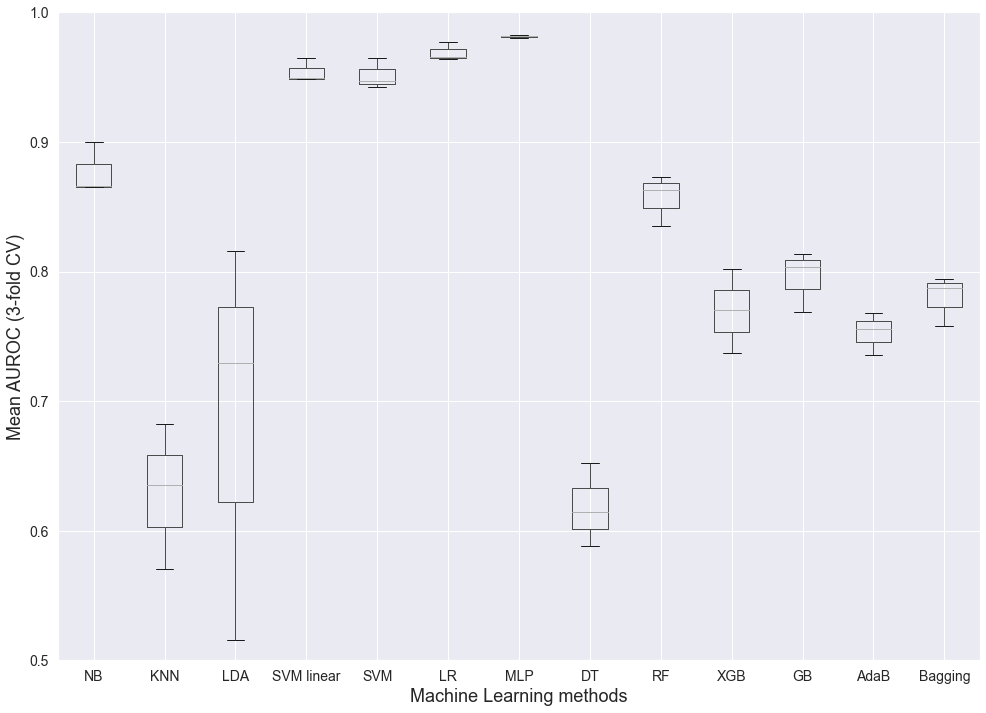

==>>> Seed= 33

Running iteration 33/50 with seed 33

-> Read dataset ./datasets/Mix_BreastCancer.csv

-> Modify dataset
Done!

-> Drop ProtID column
Done!

-> Dataset preprocessing
Inicial shape: (376, 8741)
Data points = 376
Columns (output + features)= 8741
Data types = [dtype('float64') dtype('int64')]


Column Names:
 Index(['A', 'R', 'N', 'D', 'C', 'E', 'Q', 'G', 'H', 'I',
       ...
       'DAYM780201.lag22', 'DAYM780201.lag23', 'DAYM780201.lag24',
       'DAYM780201.lag25', 'DAYM780201.lag26', 'DAYM780201.lag27',
       'DAYM780201.lag28', 'DAYM780201.lag29', 'DAYM780201.lag30', 'Class'],
      dtype='object', length=8741)
Categorical features: []
Columns with NaN:  0  /  8741
No of data points with NaN: 0  /  376
* Remove duplicates
Final shape: (376, 8741)
Done!

-> Get X & Y data, Features list
Shape (376, 8741)
Shape X data: (376, 8740)
Shape Y data: (376,)
Done!

-> Remove zero variance features
Removed features: ['WQM', 'CMH', 'CNW', 'WIW', 'WCK', 'YCW', 'WGC', 'MWH', 'IW

<Figure size 432x288 with 0 Axes>

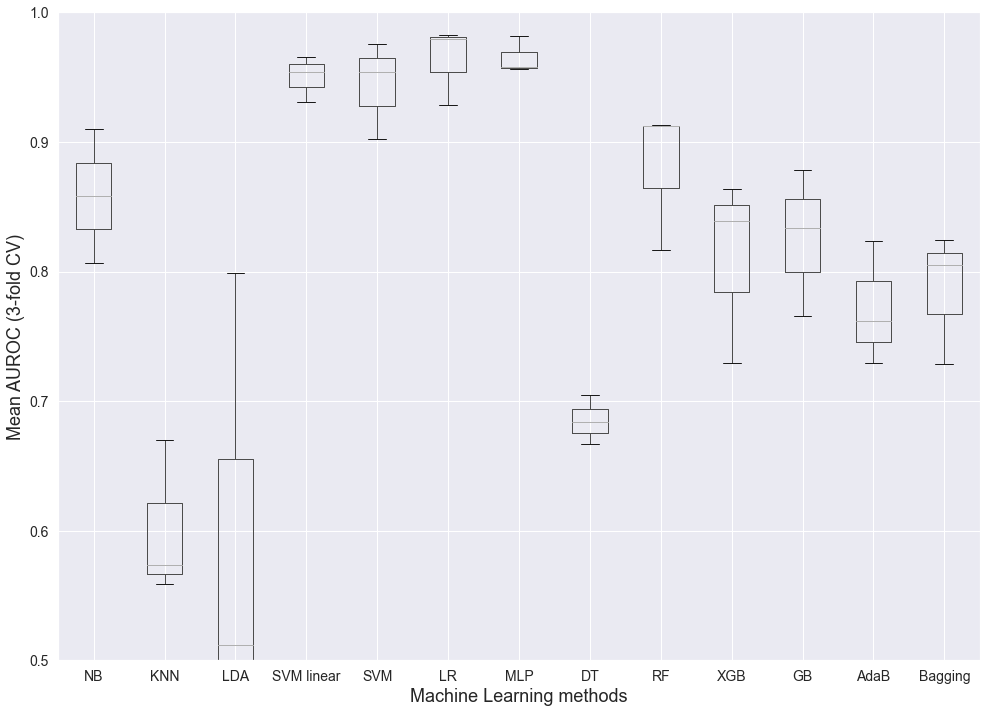

==>>> Seed= 34

Running iteration 34/50 with seed 34

-> Read dataset ./datasets/Mix_BreastCancer.csv

-> Modify dataset
Done!

-> Drop ProtID column
Done!

-> Dataset preprocessing
Inicial shape: (376, 8741)
Data points = 376
Columns (output + features)= 8741
Data types = [dtype('float64') dtype('int64')]


Column Names:
 Index(['A', 'R', 'N', 'D', 'C', 'E', 'Q', 'G', 'H', 'I',
       ...
       'DAYM780201.lag22', 'DAYM780201.lag23', 'DAYM780201.lag24',
       'DAYM780201.lag25', 'DAYM780201.lag26', 'DAYM780201.lag27',
       'DAYM780201.lag28', 'DAYM780201.lag29', 'DAYM780201.lag30', 'Class'],
      dtype='object', length=8741)
Categorical features: []
Columns with NaN:  0  /  8741
No of data points with NaN: 0  /  376
* Remove duplicates
Final shape: (376, 8741)
Done!

-> Get X & Y data, Features list
Shape (376, 8741)
Shape X data: (376, 8740)
Shape Y data: (376,)
Done!

-> Remove zero variance features
Removed features: ['WQM', 'CMH', 'CNW', 'WIW', 'WCK', 'YCW', 'WGC', 'MWH', 'IW

<Figure size 432x288 with 0 Axes>

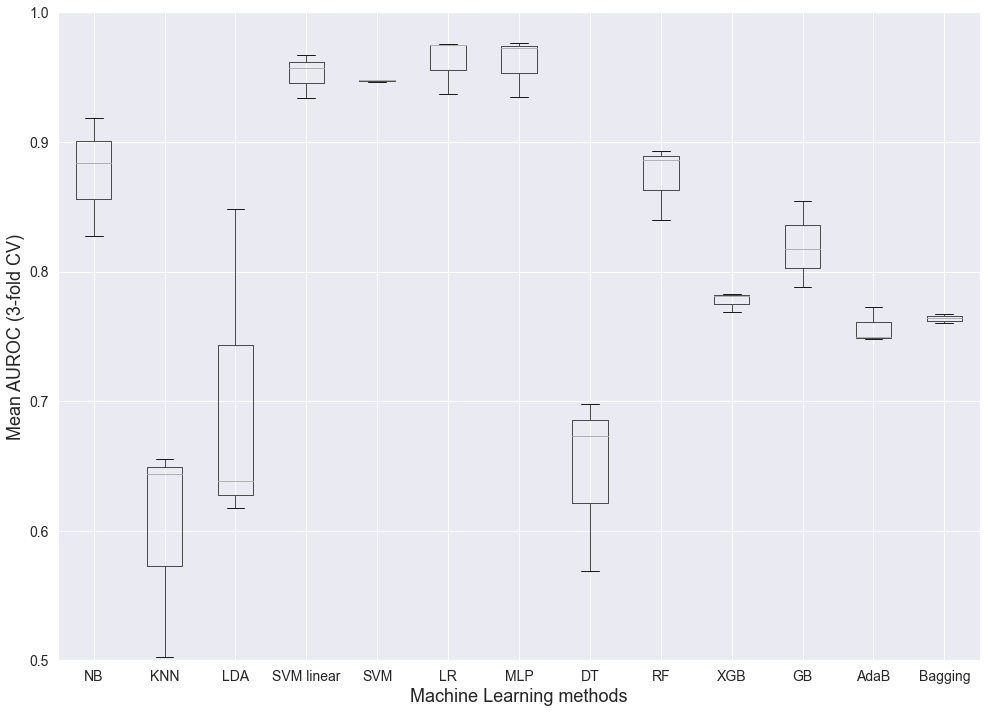

==>>> Seed= 35

Running iteration 35/50 with seed 35

-> Read dataset ./datasets/Mix_BreastCancer.csv

-> Modify dataset
Done!

-> Drop ProtID column
Done!

-> Dataset preprocessing
Inicial shape: (376, 8741)
Data points = 376
Columns (output + features)= 8741
Data types = [dtype('float64') dtype('int64')]


Column Names:
 Index(['A', 'R', 'N', 'D', 'C', 'E', 'Q', 'G', 'H', 'I',
       ...
       'DAYM780201.lag22', 'DAYM780201.lag23', 'DAYM780201.lag24',
       'DAYM780201.lag25', 'DAYM780201.lag26', 'DAYM780201.lag27',
       'DAYM780201.lag28', 'DAYM780201.lag29', 'DAYM780201.lag30', 'Class'],
      dtype='object', length=8741)
Categorical features: []
Columns with NaN:  0  /  8741
No of data points with NaN: 0  /  376
* Remove duplicates
Final shape: (376, 8741)
Done!

-> Get X & Y data, Features list
Shape (376, 8741)
Shape X data: (376, 8740)
Shape Y data: (376,)
Done!

-> Remove zero variance features
Removed features: ['WQM', 'CMH', 'CNW', 'WIW', 'WCK', 'YCW', 'WGC', 'MWH', 'IW

<Figure size 432x288 with 0 Axes>

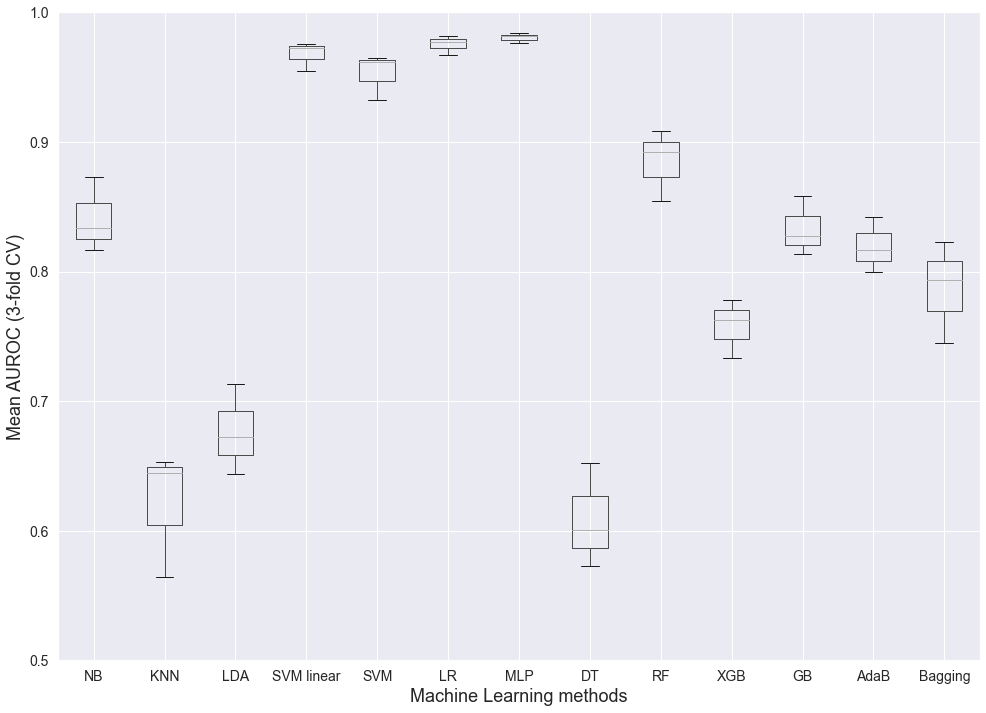

==>>> Seed= 36

Running iteration 36/50 with seed 36

-> Read dataset ./datasets/Mix_BreastCancer.csv

-> Modify dataset
Done!

-> Drop ProtID column
Done!

-> Dataset preprocessing
Inicial shape: (376, 8741)
Data points = 376
Columns (output + features)= 8741
Data types = [dtype('float64') dtype('int64')]


Column Names:
 Index(['A', 'R', 'N', 'D', 'C', 'E', 'Q', 'G', 'H', 'I',
       ...
       'DAYM780201.lag22', 'DAYM780201.lag23', 'DAYM780201.lag24',
       'DAYM780201.lag25', 'DAYM780201.lag26', 'DAYM780201.lag27',
       'DAYM780201.lag28', 'DAYM780201.lag29', 'DAYM780201.lag30', 'Class'],
      dtype='object', length=8741)
Categorical features: []
Columns with NaN:  0  /  8741
No of data points with NaN: 0  /  376
* Remove duplicates
Final shape: (376, 8741)
Done!

-> Get X & Y data, Features list
Shape (376, 8741)
Shape X data: (376, 8740)
Shape Y data: (376,)
Done!

-> Remove zero variance features
Removed features: ['WQM', 'CMH', 'CNW', 'WIW', 'WCK', 'YCW', 'WGC', 'MWH', 'IW

<Figure size 432x288 with 0 Axes>

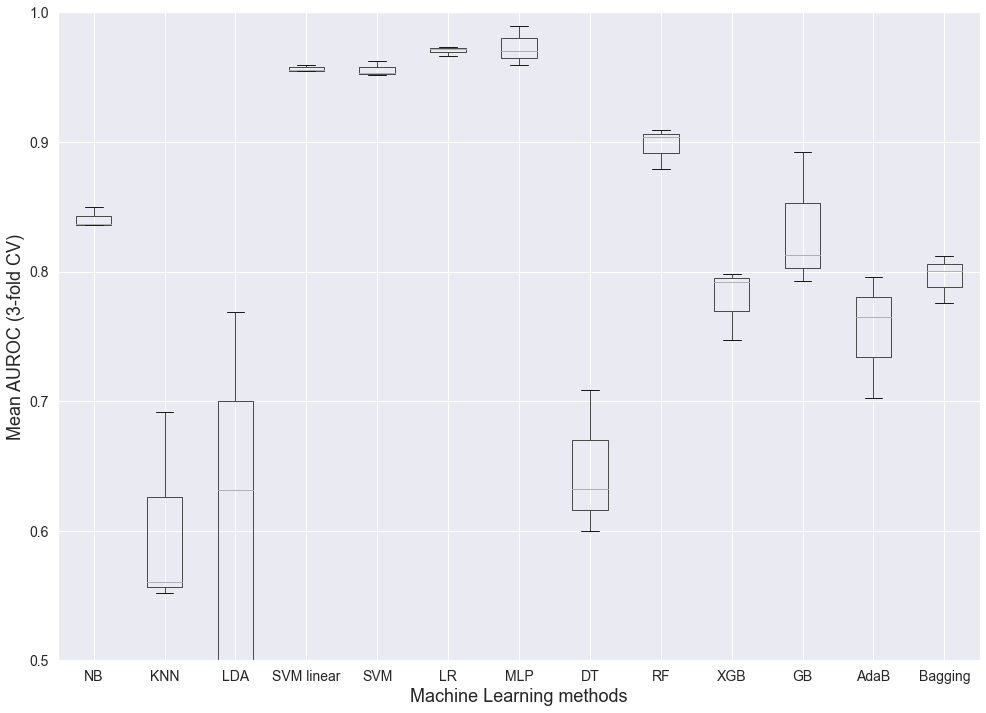

==>>> Seed= 37

Running iteration 37/50 with seed 37

-> Read dataset ./datasets/Mix_BreastCancer.csv

-> Modify dataset
Done!

-> Drop ProtID column
Done!

-> Dataset preprocessing
Inicial shape: (376, 8741)
Data points = 376
Columns (output + features)= 8741
Data types = [dtype('float64') dtype('int64')]


Column Names:
 Index(['A', 'R', 'N', 'D', 'C', 'E', 'Q', 'G', 'H', 'I',
       ...
       'DAYM780201.lag22', 'DAYM780201.lag23', 'DAYM780201.lag24',
       'DAYM780201.lag25', 'DAYM780201.lag26', 'DAYM780201.lag27',
       'DAYM780201.lag28', 'DAYM780201.lag29', 'DAYM780201.lag30', 'Class'],
      dtype='object', length=8741)
Categorical features: []
Columns with NaN:  0  /  8741
No of data points with NaN: 0  /  376
* Remove duplicates
Final shape: (376, 8741)
Done!

-> Get X & Y data, Features list
Shape (376, 8741)
Shape X data: (376, 8740)
Shape Y data: (376,)
Done!

-> Remove zero variance features
Removed features: ['WQM', 'CMH', 'CNW', 'WIW', 'WCK', 'YCW', 'WGC', 'MWH', 'IW

<Figure size 432x288 with 0 Axes>

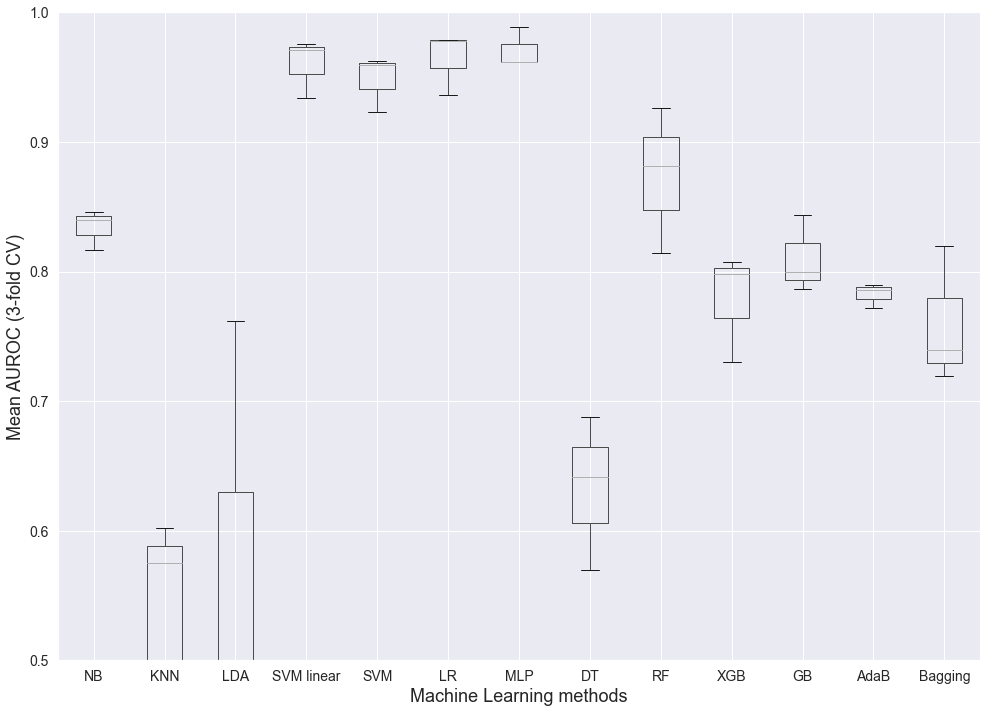

==>>> Seed= 38

Running iteration 38/50 with seed 38

-> Read dataset ./datasets/Mix_BreastCancer.csv

-> Modify dataset
Done!

-> Drop ProtID column
Done!

-> Dataset preprocessing
Inicial shape: (376, 8741)
Data points = 376
Columns (output + features)= 8741
Data types = [dtype('float64') dtype('int64')]


Column Names:
 Index(['A', 'R', 'N', 'D', 'C', 'E', 'Q', 'G', 'H', 'I',
       ...
       'DAYM780201.lag22', 'DAYM780201.lag23', 'DAYM780201.lag24',
       'DAYM780201.lag25', 'DAYM780201.lag26', 'DAYM780201.lag27',
       'DAYM780201.lag28', 'DAYM780201.lag29', 'DAYM780201.lag30', 'Class'],
      dtype='object', length=8741)
Categorical features: []
Columns with NaN:  0  /  8741
No of data points with NaN: 0  /  376
* Remove duplicates
Final shape: (376, 8741)
Done!

-> Get X & Y data, Features list
Shape (376, 8741)
Shape X data: (376, 8740)
Shape Y data: (376,)
Done!

-> Remove zero variance features
Removed features: ['WQM', 'CMH', 'CNW', 'WIW', 'WCK', 'YCW', 'WGC', 'MWH', 'IW

<Figure size 432x288 with 0 Axes>

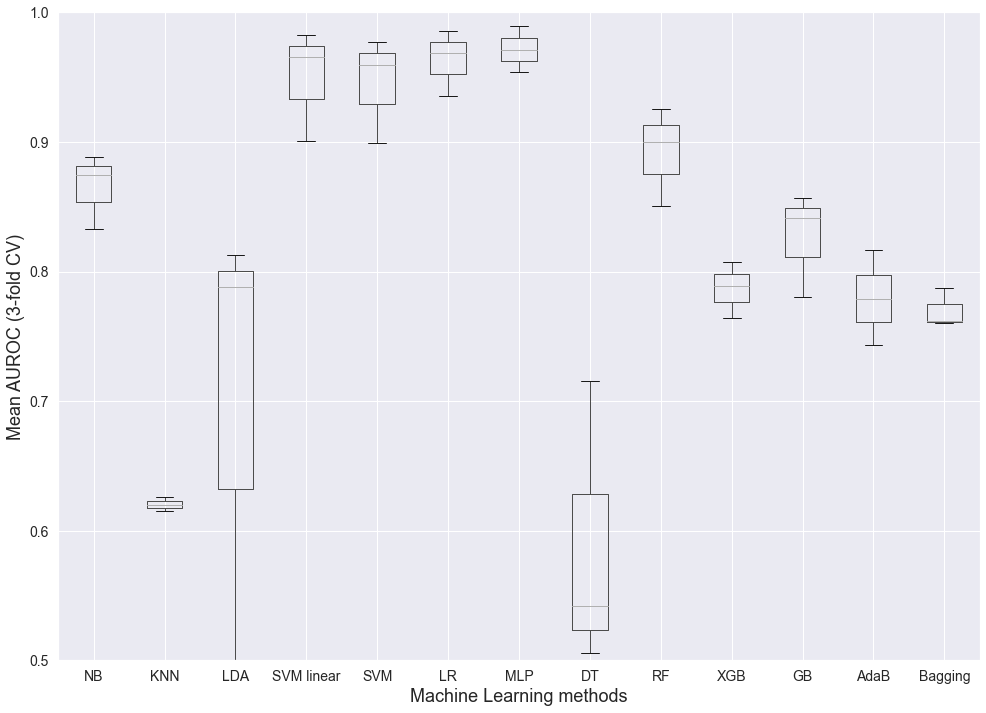

==>>> Seed= 39

Running iteration 39/50 with seed 39

-> Read dataset ./datasets/Mix_BreastCancer.csv

-> Modify dataset
Done!

-> Drop ProtID column
Done!

-> Dataset preprocessing
Inicial shape: (376, 8741)
Data points = 376
Columns (output + features)= 8741
Data types = [dtype('float64') dtype('int64')]


Column Names:
 Index(['A', 'R', 'N', 'D', 'C', 'E', 'Q', 'G', 'H', 'I',
       ...
       'DAYM780201.lag22', 'DAYM780201.lag23', 'DAYM780201.lag24',
       'DAYM780201.lag25', 'DAYM780201.lag26', 'DAYM780201.lag27',
       'DAYM780201.lag28', 'DAYM780201.lag29', 'DAYM780201.lag30', 'Class'],
      dtype='object', length=8741)
Categorical features: []
Columns with NaN:  0  /  8741
No of data points with NaN: 0  /  376
* Remove duplicates
Final shape: (376, 8741)
Done!

-> Get X & Y data, Features list
Shape (376, 8741)
Shape X data: (376, 8740)
Shape Y data: (376,)
Done!

-> Remove zero variance features
Removed features: ['WQM', 'CMH', 'CNW', 'WIW', 'WCK', 'YCW', 'WGC', 'MWH', 'IW

<Figure size 432x288 with 0 Axes>

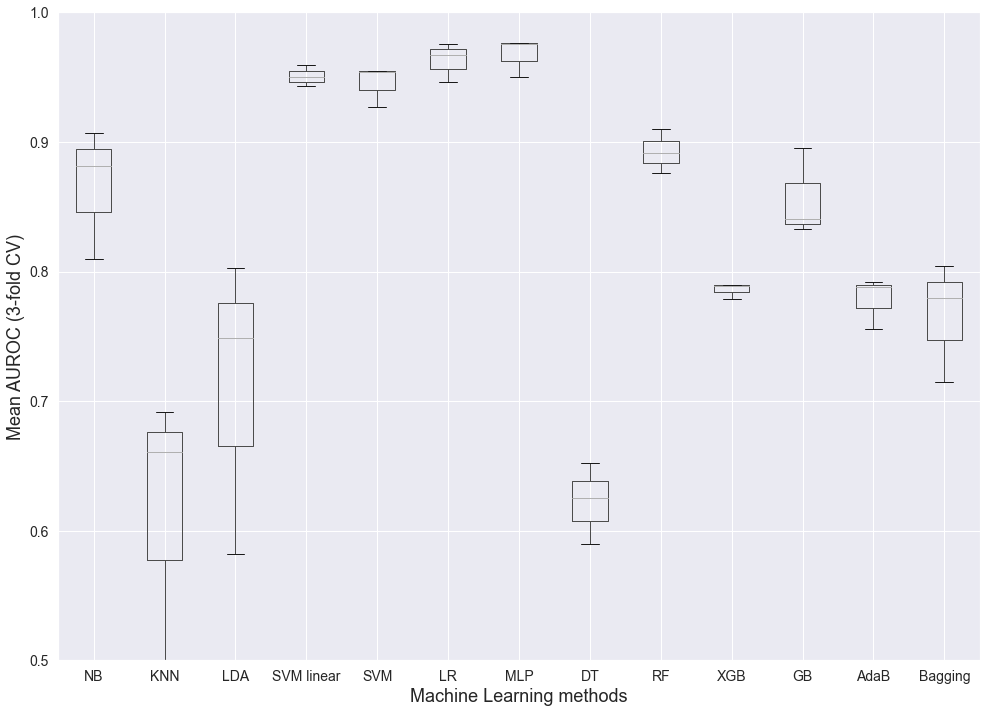

==>>> Seed= 40

Running iteration 40/50 with seed 40

-> Read dataset ./datasets/Mix_BreastCancer.csv

-> Modify dataset
Done!

-> Drop ProtID column
Done!

-> Dataset preprocessing
Inicial shape: (376, 8741)
Data points = 376
Columns (output + features)= 8741
Data types = [dtype('float64') dtype('int64')]


Column Names:
 Index(['A', 'R', 'N', 'D', 'C', 'E', 'Q', 'G', 'H', 'I',
       ...
       'DAYM780201.lag22', 'DAYM780201.lag23', 'DAYM780201.lag24',
       'DAYM780201.lag25', 'DAYM780201.lag26', 'DAYM780201.lag27',
       'DAYM780201.lag28', 'DAYM780201.lag29', 'DAYM780201.lag30', 'Class'],
      dtype='object', length=8741)
Categorical features: []
Columns with NaN:  0  /  8741
No of data points with NaN: 0  /  376
* Remove duplicates
Final shape: (376, 8741)
Done!

-> Get X & Y data, Features list
Shape (376, 8741)
Shape X data: (376, 8740)
Shape Y data: (376,)
Done!

-> Remove zero variance features
Removed features: ['WQM', 'CMH', 'CNW', 'WIW', 'WCK', 'YCW', 'WGC', 'MWH', 'IW

<Figure size 432x288 with 0 Axes>

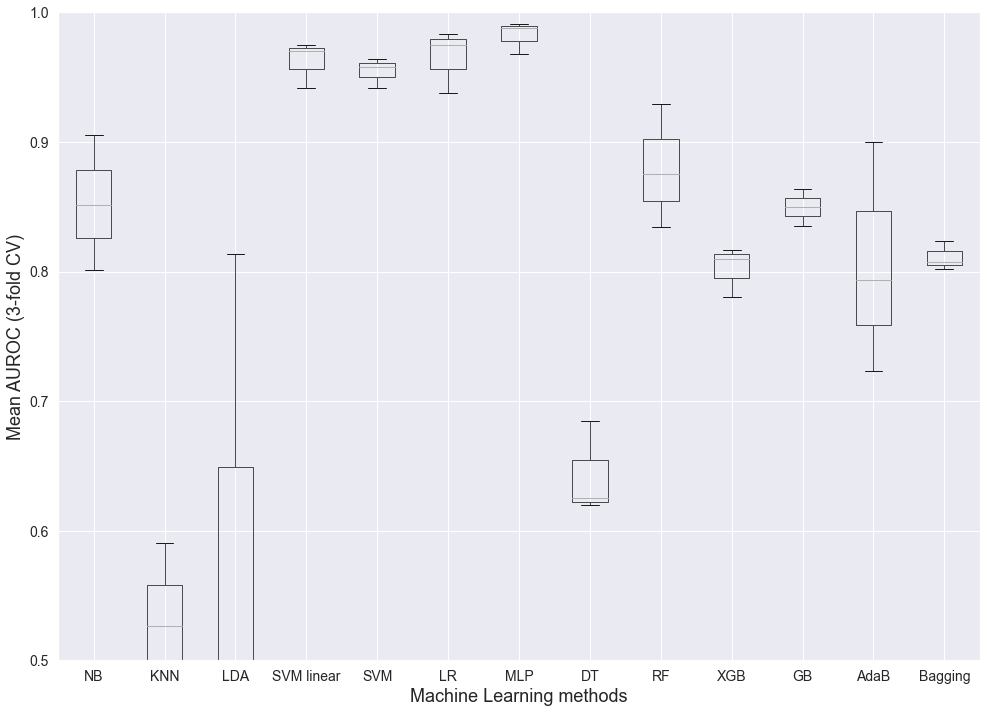

==>>> Seed= 41

Running iteration 41/50 with seed 41

-> Read dataset ./datasets/Mix_BreastCancer.csv

-> Modify dataset
Done!

-> Drop ProtID column
Done!

-> Dataset preprocessing
Inicial shape: (376, 8741)
Data points = 376
Columns (output + features)= 8741
Data types = [dtype('float64') dtype('int64')]


Column Names:
 Index(['A', 'R', 'N', 'D', 'C', 'E', 'Q', 'G', 'H', 'I',
       ...
       'DAYM780201.lag22', 'DAYM780201.lag23', 'DAYM780201.lag24',
       'DAYM780201.lag25', 'DAYM780201.lag26', 'DAYM780201.lag27',
       'DAYM780201.lag28', 'DAYM780201.lag29', 'DAYM780201.lag30', 'Class'],
      dtype='object', length=8741)
Categorical features: []
Columns with NaN:  0  /  8741
No of data points with NaN: 0  /  376
* Remove duplicates
Final shape: (376, 8741)
Done!

-> Get X & Y data, Features list
Shape (376, 8741)
Shape X data: (376, 8740)
Shape Y data: (376,)
Done!

-> Remove zero variance features
Removed features: ['WQM', 'CMH', 'CNW', 'WIW', 'WCK', 'YCW', 'WGC', 'MWH', 'IW

<Figure size 432x288 with 0 Axes>

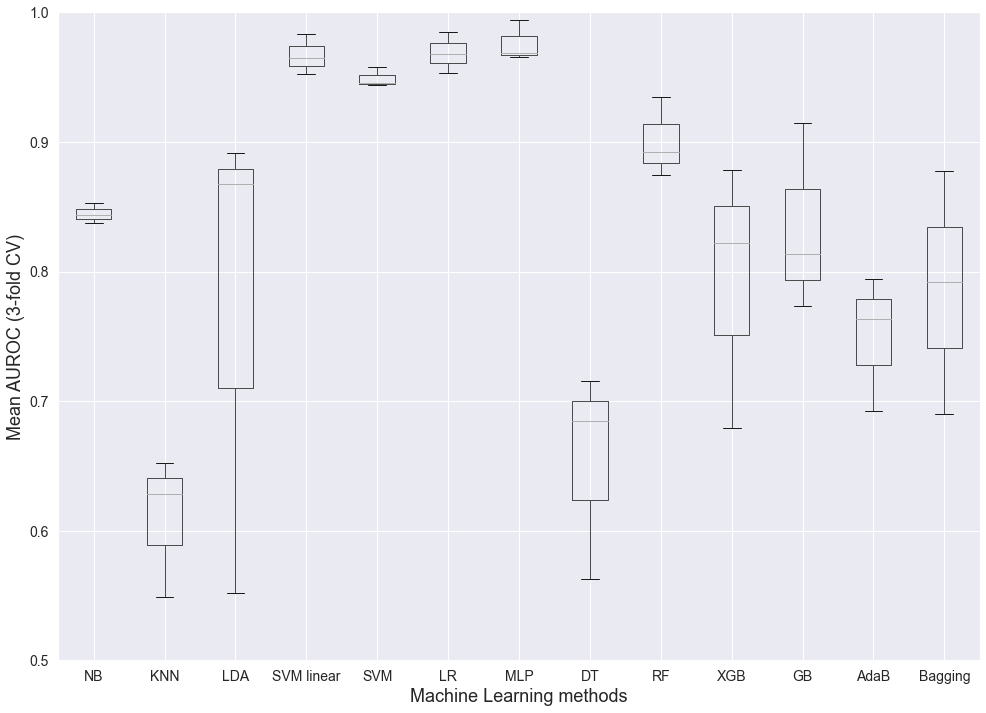

==>>> Seed= 42

Running iteration 42/50 with seed 42

-> Read dataset ./datasets/Mix_BreastCancer.csv

-> Modify dataset
Done!

-> Drop ProtID column
Done!

-> Dataset preprocessing
Inicial shape: (376, 8741)
Data points = 376
Columns (output + features)= 8741
Data types = [dtype('float64') dtype('int64')]


Column Names:
 Index(['A', 'R', 'N', 'D', 'C', 'E', 'Q', 'G', 'H', 'I',
       ...
       'DAYM780201.lag22', 'DAYM780201.lag23', 'DAYM780201.lag24',
       'DAYM780201.lag25', 'DAYM780201.lag26', 'DAYM780201.lag27',
       'DAYM780201.lag28', 'DAYM780201.lag29', 'DAYM780201.lag30', 'Class'],
      dtype='object', length=8741)
Categorical features: []
Columns with NaN:  0  /  8741
No of data points with NaN: 0  /  376
* Remove duplicates
Final shape: (376, 8741)
Done!

-> Get X & Y data, Features list
Shape (376, 8741)
Shape X data: (376, 8740)
Shape Y data: (376,)
Done!

-> Remove zero variance features
Removed features: ['WQM', 'CMH', 'CNW', 'WIW', 'WCK', 'YCW', 'WGC', 'MWH', 'IW

<Figure size 432x288 with 0 Axes>

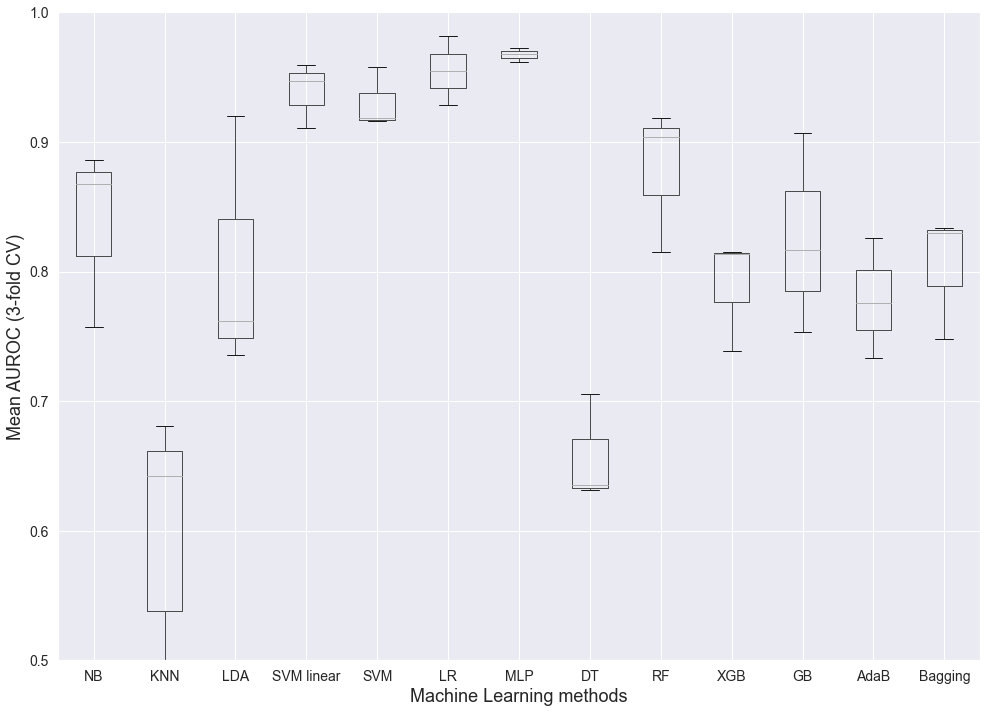

==>>> Seed= 43

Running iteration 43/50 with seed 43

-> Read dataset ./datasets/Mix_BreastCancer.csv

-> Modify dataset
Done!

-> Drop ProtID column
Done!

-> Dataset preprocessing
Inicial shape: (376, 8741)
Data points = 376
Columns (output + features)= 8741
Data types = [dtype('float64') dtype('int64')]


Column Names:
 Index(['A', 'R', 'N', 'D', 'C', 'E', 'Q', 'G', 'H', 'I',
       ...
       'DAYM780201.lag22', 'DAYM780201.lag23', 'DAYM780201.lag24',
       'DAYM780201.lag25', 'DAYM780201.lag26', 'DAYM780201.lag27',
       'DAYM780201.lag28', 'DAYM780201.lag29', 'DAYM780201.lag30', 'Class'],
      dtype='object', length=8741)
Categorical features: []
Columns with NaN:  0  /  8741
No of data points with NaN: 0  /  376
* Remove duplicates
Final shape: (376, 8741)
Done!

-> Get X & Y data, Features list
Shape (376, 8741)
Shape X data: (376, 8740)
Shape Y data: (376,)
Done!

-> Remove zero variance features
Removed features: ['WQM', 'CMH', 'CNW', 'WIW', 'WCK', 'YCW', 'WGC', 'MWH', 'IW

<Figure size 432x288 with 0 Axes>

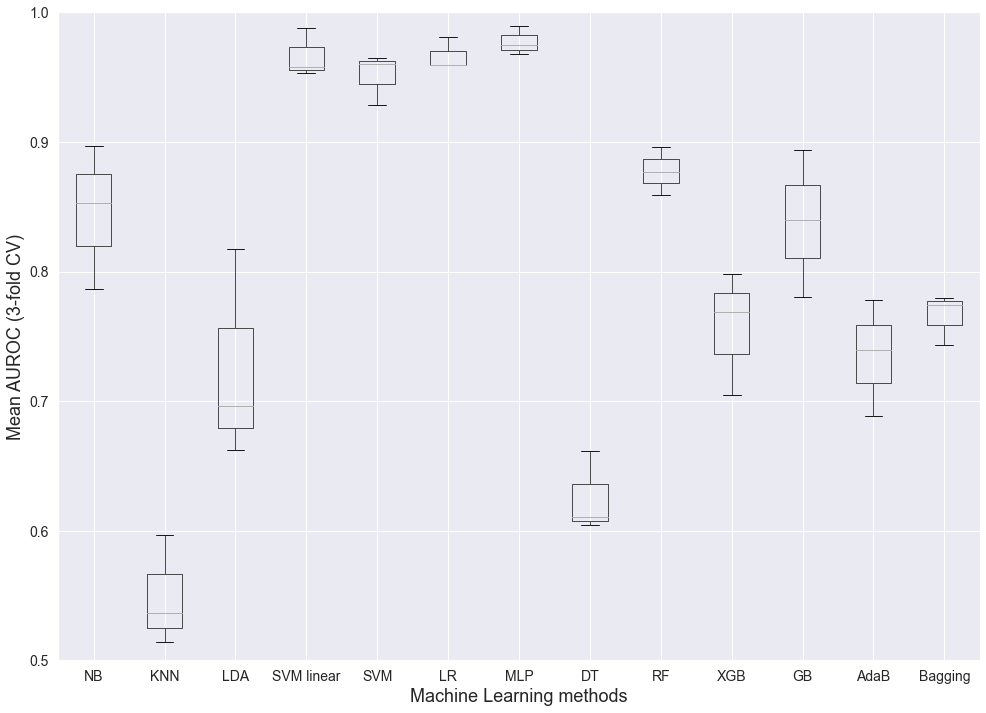

==>>> Seed= 44

Running iteration 44/50 with seed 44

-> Read dataset ./datasets/Mix_BreastCancer.csv

-> Modify dataset
Done!

-> Drop ProtID column
Done!

-> Dataset preprocessing
Inicial shape: (376, 8741)
Data points = 376
Columns (output + features)= 8741
Data types = [dtype('float64') dtype('int64')]


Column Names:
 Index(['A', 'R', 'N', 'D', 'C', 'E', 'Q', 'G', 'H', 'I',
       ...
       'DAYM780201.lag22', 'DAYM780201.lag23', 'DAYM780201.lag24',
       'DAYM780201.lag25', 'DAYM780201.lag26', 'DAYM780201.lag27',
       'DAYM780201.lag28', 'DAYM780201.lag29', 'DAYM780201.lag30', 'Class'],
      dtype='object', length=8741)
Categorical features: []
Columns with NaN:  0  /  8741
No of data points with NaN: 0  /  376
* Remove duplicates
Final shape: (376, 8741)
Done!

-> Get X & Y data, Features list
Shape (376, 8741)
Shape X data: (376, 8740)
Shape Y data: (376,)
Done!

-> Remove zero variance features
Removed features: ['WQM', 'CMH', 'CNW', 'WIW', 'WCK', 'YCW', 'WGC', 'MWH', 'IW

<Figure size 432x288 with 0 Axes>

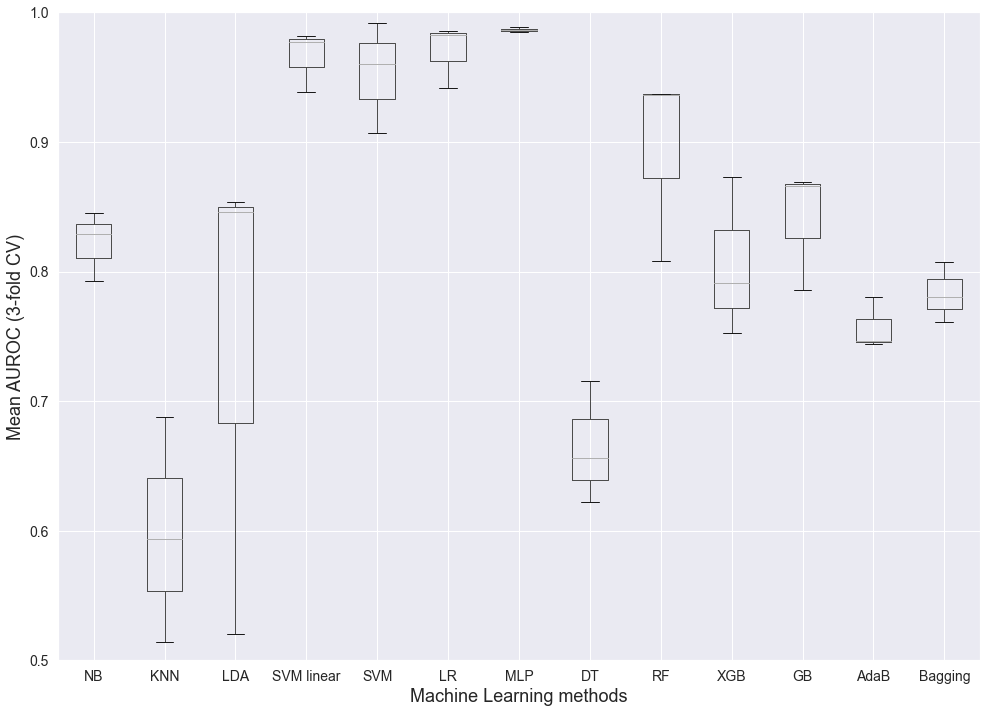

==>>> Seed= 45

Running iteration 45/50 with seed 45

-> Read dataset ./datasets/Mix_BreastCancer.csv

-> Modify dataset
Done!

-> Drop ProtID column
Done!

-> Dataset preprocessing
Inicial shape: (376, 8741)
Data points = 376
Columns (output + features)= 8741
Data types = [dtype('float64') dtype('int64')]


Column Names:
 Index(['A', 'R', 'N', 'D', 'C', 'E', 'Q', 'G', 'H', 'I',
       ...
       'DAYM780201.lag22', 'DAYM780201.lag23', 'DAYM780201.lag24',
       'DAYM780201.lag25', 'DAYM780201.lag26', 'DAYM780201.lag27',
       'DAYM780201.lag28', 'DAYM780201.lag29', 'DAYM780201.lag30', 'Class'],
      dtype='object', length=8741)
Categorical features: []
Columns with NaN:  0  /  8741
No of data points with NaN: 0  /  376
* Remove duplicates
Final shape: (376, 8741)
Done!

-> Get X & Y data, Features list
Shape (376, 8741)
Shape X data: (376, 8740)
Shape Y data: (376,)
Done!

-> Remove zero variance features
Removed features: ['WQM', 'CMH', 'CNW', 'WIW', 'WCK', 'YCW', 'WGC', 'MWH', 'IW

<Figure size 432x288 with 0 Axes>

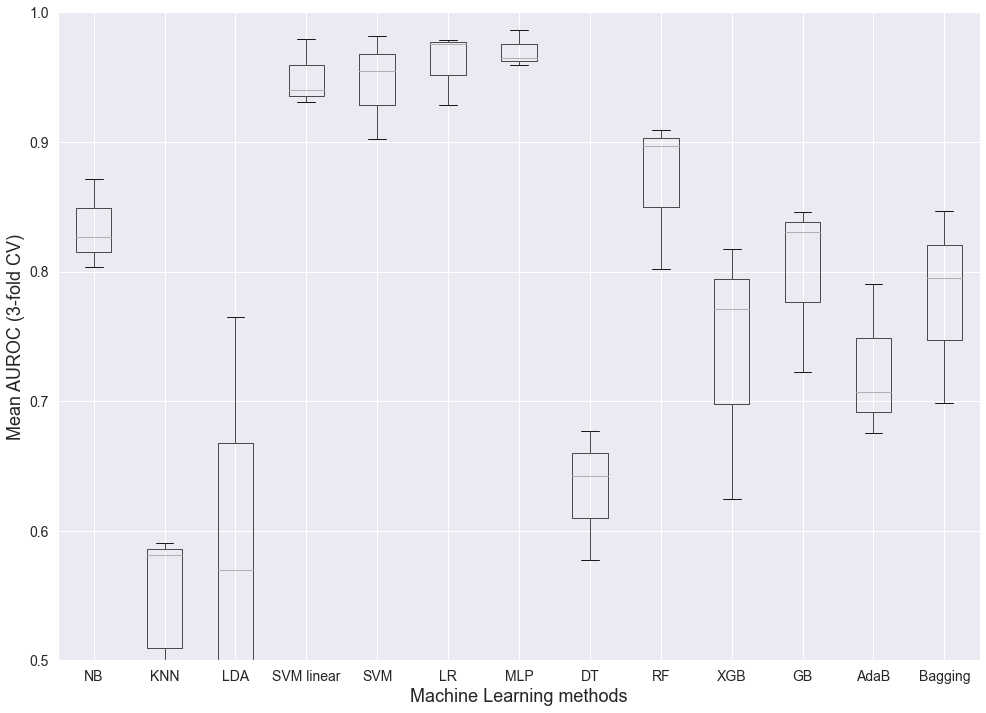

==>>> Seed= 46

Running iteration 46/50 with seed 46

-> Read dataset ./datasets/Mix_BreastCancer.csv

-> Modify dataset
Done!

-> Drop ProtID column
Done!

-> Dataset preprocessing
Inicial shape: (376, 8741)
Data points = 376
Columns (output + features)= 8741
Data types = [dtype('float64') dtype('int64')]


Column Names:
 Index(['A', 'R', 'N', 'D', 'C', 'E', 'Q', 'G', 'H', 'I',
       ...
       'DAYM780201.lag22', 'DAYM780201.lag23', 'DAYM780201.lag24',
       'DAYM780201.lag25', 'DAYM780201.lag26', 'DAYM780201.lag27',
       'DAYM780201.lag28', 'DAYM780201.lag29', 'DAYM780201.lag30', 'Class'],
      dtype='object', length=8741)
Categorical features: []
Columns with NaN:  0  /  8741
No of data points with NaN: 0  /  376
* Remove duplicates
Final shape: (376, 8741)
Done!

-> Get X & Y data, Features list
Shape (376, 8741)
Shape X data: (376, 8740)
Shape Y data: (376,)
Done!

-> Remove zero variance features
Removed features: ['WQM', 'CMH', 'CNW', 'WIW', 'WCK', 'YCW', 'WGC', 'MWH', 'IW

<Figure size 432x288 with 0 Axes>

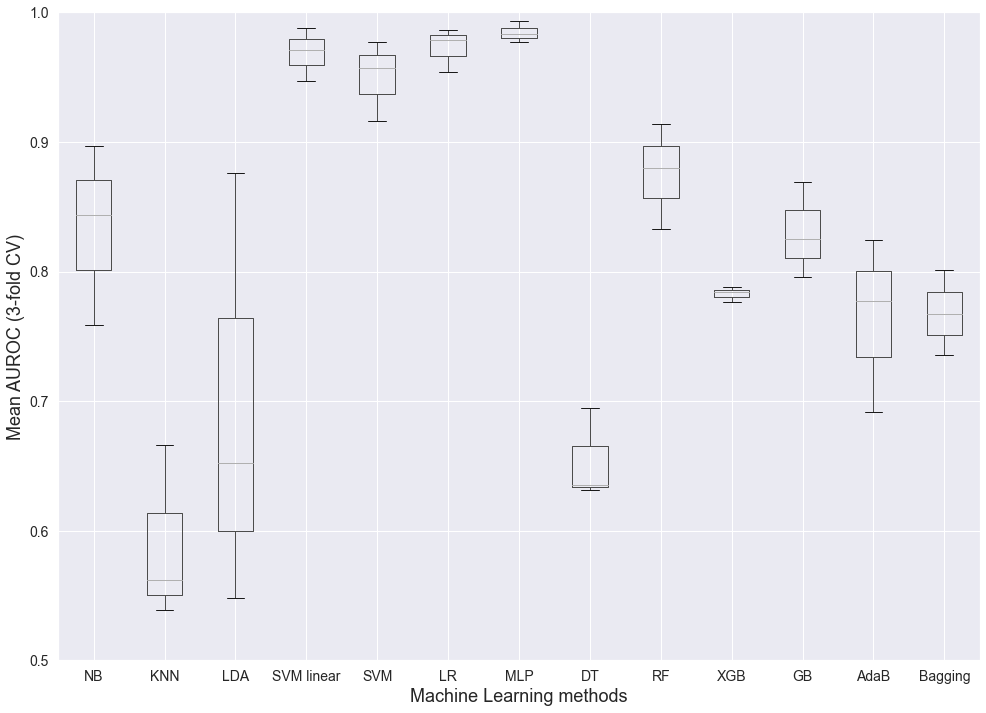

==>>> Seed= 47

Running iteration 47/50 with seed 47

-> Read dataset ./datasets/Mix_BreastCancer.csv

-> Modify dataset
Done!

-> Drop ProtID column
Done!

-> Dataset preprocessing
Inicial shape: (376, 8741)
Data points = 376
Columns (output + features)= 8741
Data types = [dtype('float64') dtype('int64')]


Column Names:
 Index(['A', 'R', 'N', 'D', 'C', 'E', 'Q', 'G', 'H', 'I',
       ...
       'DAYM780201.lag22', 'DAYM780201.lag23', 'DAYM780201.lag24',
       'DAYM780201.lag25', 'DAYM780201.lag26', 'DAYM780201.lag27',
       'DAYM780201.lag28', 'DAYM780201.lag29', 'DAYM780201.lag30', 'Class'],
      dtype='object', length=8741)
Categorical features: []
Columns with NaN:  0  /  8741
No of data points with NaN: 0  /  376
* Remove duplicates
Final shape: (376, 8741)
Done!

-> Get X & Y data, Features list
Shape (376, 8741)
Shape X data: (376, 8740)
Shape Y data: (376,)
Done!

-> Remove zero variance features
Removed features: ['WQM', 'CMH', 'CNW', 'WIW', 'WCK', 'YCW', 'WGC', 'MWH', 'IW

<Figure size 432x288 with 0 Axes>

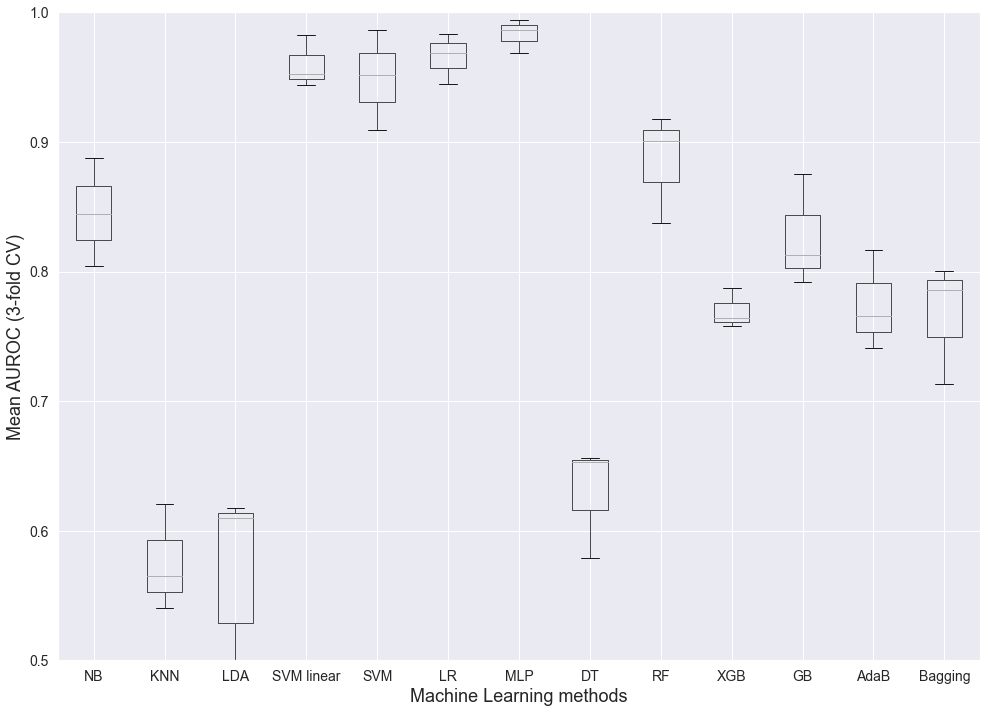

==>>> Seed= 48

Running iteration 48/50 with seed 48

-> Read dataset ./datasets/Mix_BreastCancer.csv

-> Modify dataset
Done!

-> Drop ProtID column
Done!

-> Dataset preprocessing
Inicial shape: (376, 8741)
Data points = 376
Columns (output + features)= 8741
Data types = [dtype('float64') dtype('int64')]


Column Names:
 Index(['A', 'R', 'N', 'D', 'C', 'E', 'Q', 'G', 'H', 'I',
       ...
       'DAYM780201.lag22', 'DAYM780201.lag23', 'DAYM780201.lag24',
       'DAYM780201.lag25', 'DAYM780201.lag26', 'DAYM780201.lag27',
       'DAYM780201.lag28', 'DAYM780201.lag29', 'DAYM780201.lag30', 'Class'],
      dtype='object', length=8741)
Categorical features: []
Columns with NaN:  0  /  8741
No of data points with NaN: 0  /  376
* Remove duplicates
Final shape: (376, 8741)
Done!

-> Get X & Y data, Features list
Shape (376, 8741)
Shape X data: (376, 8740)
Shape Y data: (376,)
Done!

-> Remove zero variance features
Removed features: ['WQM', 'CMH', 'CNW', 'WIW', 'WCK', 'YCW', 'WGC', 'MWH', 'IW

<Figure size 432x288 with 0 Axes>

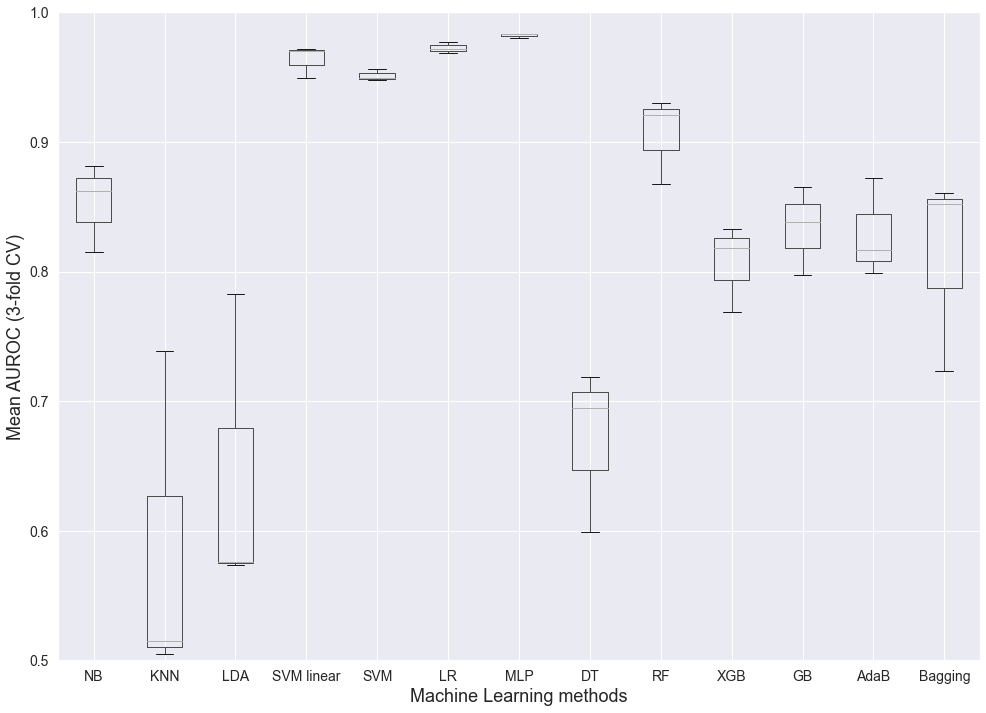

==>>> Seed= 49

Running iteration 49/50 with seed 49

-> Read dataset ./datasets/Mix_BreastCancer.csv

-> Modify dataset
Done!

-> Drop ProtID column
Done!

-> Dataset preprocessing
Inicial shape: (376, 8741)
Data points = 376
Columns (output + features)= 8741
Data types = [dtype('float64') dtype('int64')]


Column Names:
 Index(['A', 'R', 'N', 'D', 'C', 'E', 'Q', 'G', 'H', 'I',
       ...
       'DAYM780201.lag22', 'DAYM780201.lag23', 'DAYM780201.lag24',
       'DAYM780201.lag25', 'DAYM780201.lag26', 'DAYM780201.lag27',
       'DAYM780201.lag28', 'DAYM780201.lag29', 'DAYM780201.lag30', 'Class'],
      dtype='object', length=8741)
Categorical features: []
Columns with NaN:  0  /  8741
No of data points with NaN: 0  /  376
* Remove duplicates
Final shape: (376, 8741)
Done!

-> Get X & Y data, Features list
Shape (376, 8741)
Shape X data: (376, 8740)
Shape Y data: (376,)
Done!

-> Remove zero variance features
Removed features: ['WQM', 'CMH', 'CNW', 'WIW', 'WCK', 'YCW', 'WGC', 'MWH', 'IW

<Figure size 432x288 with 0 Axes>

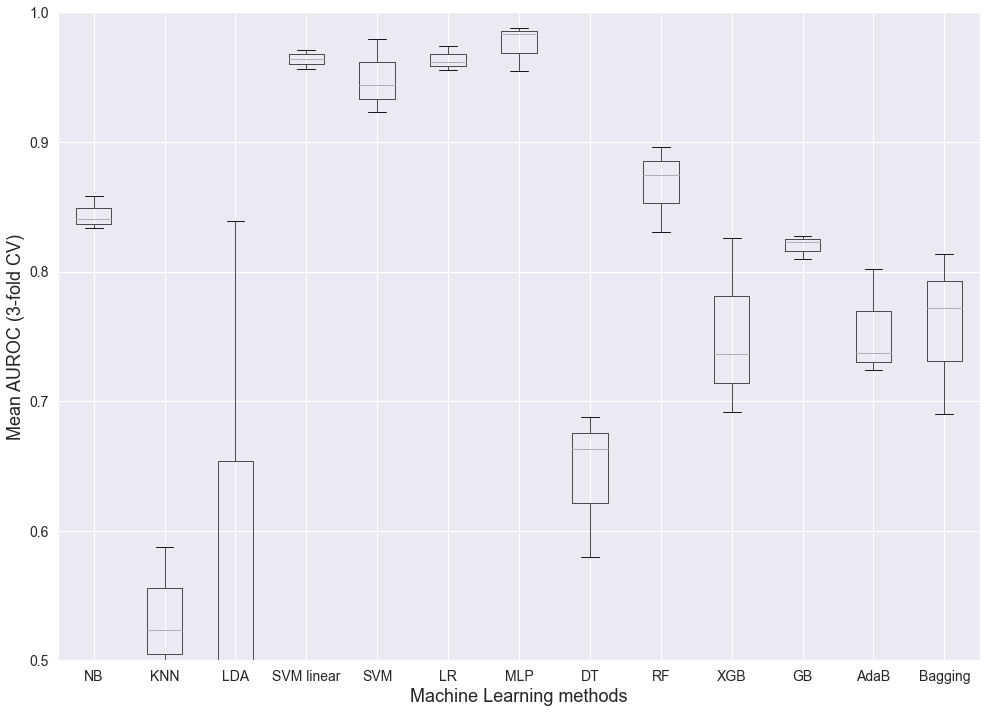

==>>> Seed= 50

Running iteration 50/50 with seed 50

-> Read dataset ./datasets/Mix_BreastCancer.csv

-> Modify dataset
Done!

-> Drop ProtID column
Done!

-> Dataset preprocessing
Inicial shape: (376, 8741)
Data points = 376
Columns (output + features)= 8741
Data types = [dtype('float64') dtype('int64')]


Column Names:
 Index(['A', 'R', 'N', 'D', 'C', 'E', 'Q', 'G', 'H', 'I',
       ...
       'DAYM780201.lag22', 'DAYM780201.lag23', 'DAYM780201.lag24',
       'DAYM780201.lag25', 'DAYM780201.lag26', 'DAYM780201.lag27',
       'DAYM780201.lag28', 'DAYM780201.lag29', 'DAYM780201.lag30', 'Class'],
      dtype='object', length=8741)
Categorical features: []
Columns with NaN:  0  /  8741
No of data points with NaN: 0  /  376
* Remove duplicates
Final shape: (376, 8741)
Done!

-> Get X & Y data, Features list
Shape (376, 8741)
Shape X data: (376, 8740)
Shape Y data: (376,)
Done!

-> Remove zero variance features
Removed features: ['WQM', 'CMH', 'CNW', 'WIW', 'WCK', 'YCW', 'WGC', 'MWH', 'IW

<Figure size 432x288 with 0 Axes>

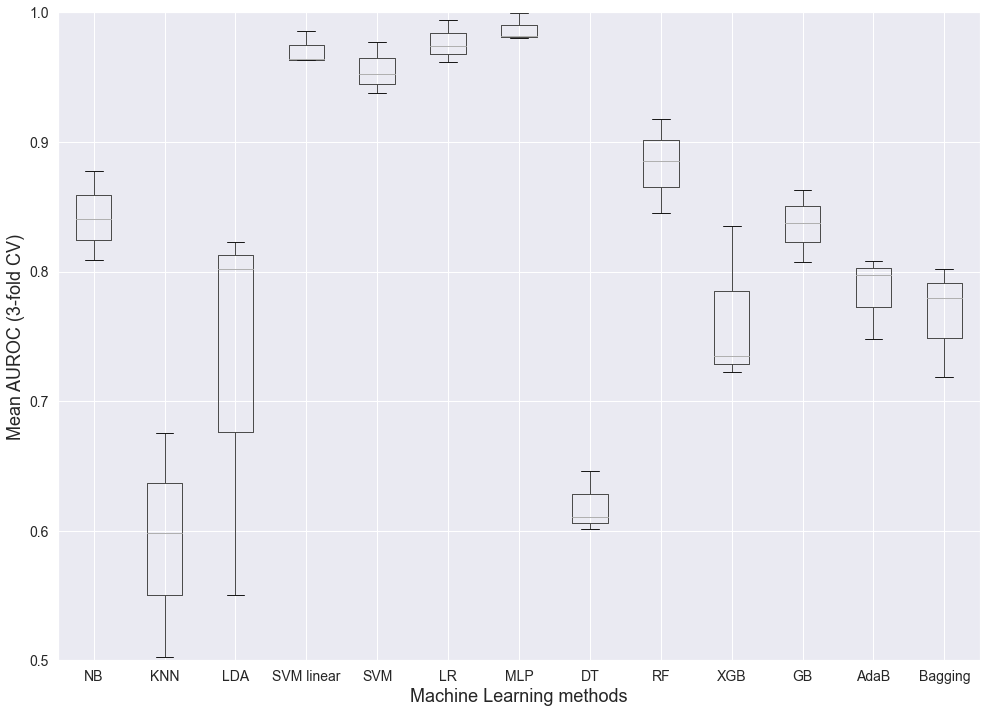


All iterations completed!


In [10]:
import os

base_sFile = './datasets/Mix_BreastCancer.csv'
base_summaryFile = './results/Mix_BreastCancer.m.bal_pool_8708_UnderBeforeSplit_seed{}.csv'
base_boxplotFile = './results/Mix_BreastCancer.m.bal_pool_8708_UnderBeforeSplit_seed{}.png'

# Create the results directory if it doesn't exist
os.makedirs('./results', exist_ok=True)

# Run the function 50 times with different seeds
for i in range(50):
    seed = i + 1  # Using seeds 1 to 50
    print("==>>> Seed=", seed)
    
    sFile = base_sFile
    summaryFile = base_summaryFile.format(seed)
    boxplotFile = base_boxplotFile.format(seed)
    
    print(f"\nRunning iteration {i+1}/50 with seed {seed}")
    MyML_UnderBeforeSplit(sFile, summaryFile, boxplotFile, nSel=300, nPCA=0, outVar='Class', nfold=3, seed=seed)

print("\nAll iterations completed!")